In [1]:
from decimal import *
getcontext().prec = 8

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import csv

In [3]:
DOLLARS_PER_NEO = 30
DOLLARS_PER_NEOGAS = 6

DOLLARS_PER_ETHER = 4300
DOLLARS_PER_GWEI = DOLLARS_PER_ETHER / (10**9)
DOLLARS_PER_WEI = DOLLARS_PER_GWEI / (10*9)
GWEI_PER_ETHGAS = 100 #(gwei)
DOLLAR_PER_ETHGAS = (GWEI_PER_ETHGAS * DOLLARS_PER_ETHER) / (10**9)

In [4]:
ethFormerPayoutFilename = 'evaluation_results/eth/formerPayout.csv'

ethBatchPayoutFilename = 'evaluation_results/eth/batchPayout.csv'
ethWithdrawFilename = 'evaluation_results/eth/withdraw.csv'

neoBatchPayoutFilename = 'evaluation_results/neo/batchPayout-int64.csv'
neoBatchPayoutPresetFilename = 'evaluation_results/neo/batchPayout-int64-preset.csv'
neoWithdrawSignatureFilename = 'evaluation_results/neo/withdraw-signature.csv'
neoWithdrawWitnessFilename = 'evaluation_results/neo/withdraw-witness.csv'

In [5]:
# Read Former Payout Information
formerAccounts = []
formerFillGas = []
formerFillPerAccountGas = []
formerFillPresetGas = []
formerFillPresetPerAccountGas = []

i = 0
with open(ethFormerPayoutFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i == 1:
            continue
        if i == 2:
            formerReleaseGas = int(row[0].split('=')[1])
            continue
        accounts = int(row[0])
        formerAccounts.append(accounts)
        fillGas = int(row[1])
        formerFillGas.append(fillGas)
        formerFillPerAccountGas.append(fillGas / accounts)
        presetFillGas = int(row[2])
        formerFillPresetGas.append(presetFillGas)
        formerFillPresetPerAccountGas.append(presetFillGas / accounts)

# Post:
# formerReleaseGas
# formerAccounts[]
# formerFillGas[]
# formerFillPerAccountGas[]
# formerFillPresetGas[]
# formerFillPresetPerAccountGas[]

In [6]:
# Former Solution Calculate USD
formerFillUSD = []
formerFillPerAccountUSD = []
formerFillPresetUSD = []
formerFillPresetPerAccountUSD = []

for i in range(len(formerAccounts)):
    formerFillUSD.append(formerFillGas[i] * DOLLAR_PER_ETHGAS)
    formerFillPerAccountUSD.append(formerFillPerAccountGas[i] * DOLLAR_PER_ETHGAS)
    formerFillPresetUSD.append(formerFillPresetGas[i] * DOLLAR_PER_ETHGAS)
    formerFillPresetPerAccountUSD.append(formerFillPresetPerAccountGas[i] * DOLLAR_PER_ETHGAS)


formerReleaseUSD = formerReleaseGas * DOLLAR_PER_ETHGAS

# Post:
# formerReleaseUSD
# formerFillUSD
# formerFillPresetUSD

In [7]:
# Read Ethereum Payout Information

# batch
ethAccounts = []
ethBatchTotalGas = []
ethBatchPerAccountGas = []

ethBatchPresetTotalGas = []
ethBatchPresetPerAccountGas = []

i = 0
with open(ethBatchPayoutFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i == 1:
            continue
        ethAccounts.append(int(row[0]))
        ethBatchTotalGas.append(int(row[1]))
        ethBatchPerAccountGas.append(int(row[2]))
        ethBatchPresetTotalGas.append(int(row[3]))
        ethBatchPresetPerAccountGas.append(int(row[4]))

# withdraw (retrieve the highest estimated gas)
i = 0
ethWithdrawGas = 0
ethWithdrawPresetGas = 0
with open(ethWithdrawFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i == 1:
            continue
        currentWithdrawGas = int(row[1])
        currentWithdrawPresetGas = int(row[2])
        if currentWithdrawGas > ethWithdrawGas:
            ethWithdrawGas = currentWithdrawGas
        if currentWithdrawPresetGas > ethWithdrawPresetGas:
            ethWithdrawPresetGas = currentWithdrawPresetGas

# Post:
#
# ethAccounts[]
# ethBatchTotalGas[]
# ethBatchPerAccountGas[]
#
# ethBatchPresetTotalGas[]
# ethBatchPresetPerAccountGas[]
#
# ethWithdrawGas
# ethWithdrawPresetGas

In [8]:
# Ethereum Calculate USD
ethBatchTotalUSD = []
ethBatchPerAccountUSD = []

ethBatchPresetTotalUSD = []
ethBatchPresetPerAccountUSD = []

for i in range(len(ethAccounts)):
    ethBatchTotalUSD.append(ethBatchTotalGas[i] * DOLLAR_PER_ETHGAS)
    ethBatchPerAccountUSD.append(ethBatchPerAccountGas[i] * DOLLAR_PER_ETHGAS)
    
    ethBatchPresetTotalUSD.append(ethBatchPresetTotalGas[i] * DOLLAR_PER_ETHGAS)
    ethBatchPresetPerAccountUSD.append(ethBatchPresetPerAccountGas[i] * DOLLAR_PER_ETHGAS)

ethWithdrawUSD = ethWithdrawGas * DOLLAR_PER_ETHGAS
ethWithdrawPresetUSD = ethWithdrawPresetGas * DOLLAR_PER_ETHGAS

# Post:
#
# ethBatchTotalUSD = []
# ethBatchPerAccountUSD = []
#
# ethBatchPresetTotalUSD = []
# ethBatchPresetPerAccountUSD = []
#
# ethWithdrawUSD
# ethWithdrawPresetUSD

In [9]:
# Read Neo N3 Payout Information
# (only int64 based information)

# batch
neoAccounts = []
neoBatchTotalGas = []
neoBatchPerAccountGas = []

neoBatchPresetTotalGas = []
neoBatchPresetPerAccountGas = []

# batch (no preset)
i = 0
with open(neoBatchPayoutFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 5:
            continue
        neoAccounts.append(int(row[0]))
        neoBatchTotalGas.append(float(row[1]))
        neoBatchPerAccountGas.append(float(row[2]))

# batch (with preset)
i = 0
with open(neoBatchPayoutPresetFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 6:
            continue
        neoBatchPresetTotalGas.append(float(row[1]))
        neoBatchPresetPerAccountGas.append(float(row[2]))

        
# withdraw signature
i = 0
with open(neoWithdrawSignatureFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 4:
            continue
        if i == 5:
            neoWithdrawSignatureInt32Gas = float(row[2])
        if i == 6:
            neoWithdrawSignatureInt64Gas = float(row[2])
        if i == 7:
            neoWithdrawSignatureInt32PresetGas = float(row[2])
        if i == 9:
            neoWithdrawSignatureInt64PresetGas = float(row[2])

i = 0
with open(neoWithdrawWitnessFilename) as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        i += 1
        if i <= 4:
            continue
        if i == 5:
            neoWithdrawWitnessInt32Gas = float(row[2])
        if i == 6:
            neoWithdrawWitnessInt64Gas = float(row[2])
        if i == 7:
            neoWithdrawWitnessInt32PresetGas = float(row[2])
        if i == 9:
            neoWithdrawWitnessInt64PresetGas = float(row[2])

# Post:
#
# neoAccounts = []
# neoBatchTotalGas = []
# neoBatchPerAccountGas = []
#
# neoBatchPresetTotalGas = []
# neoBatchPresetPerAccountGas = []
#
# neoWithdrawSignatureInt32Gas
# neoWithdrawSignatureInt32PresetGas
# neoWithdrawSignatureInt64Gas
# neoWithdrawSignatureInt64PresetGas
#
# neoWithdrawWitnessInt32Gas
# neoWithdrawWitnessInt32PresetGas
# neoWithdrawWitnessInt64Gas
# neoWithdrawWitnessInt64PresetGas

In [10]:
# Neo N3 Calculate USD
neoBatchTotalUSD = []
neoBatchPerAccountUSD = []

neoBatchPresetTotalUSD = []
neoBatchPresetPerAccountUSD = []

for i in range(len(neoAccounts)):
    neoBatchTotalUSD.append(neoBatchTotalGas[i] * DOLLARS_PER_NEOGAS)
    neoBatchPerAccountUSD.append(neoBatchPerAccountGas[i] * DOLLARS_PER_NEOGAS)

    neoBatchPresetTotalUSD.append(neoBatchPresetTotalGas[i] * DOLLARS_PER_NEOGAS)
    neoBatchPresetPerAccountUSD.append(neoBatchPresetPerAccountGas[i] * DOLLARS_PER_NEOGAS)

neoWithdrawSignatureInt32USD = neoWithdrawSignatureInt32Gas * DOLLARS_PER_NEOGAS
neoWithdrawSignatureInt32PresetUSD = neoWithdrawSignatureInt32PresetGas * DOLLARS_PER_NEOGAS
neoWithdrawSignatureInt64USD = neoWithdrawSignatureInt64Gas * DOLLARS_PER_NEOGAS
neoWithdrawSignatureInt64PresetUSD = neoWithdrawSignatureInt64PresetGas * DOLLARS_PER_NEOGAS

neoWithdrawWitnessInt32USD = neoWithdrawWitnessInt32Gas * DOLLARS_PER_NEOGAS
neoWithdrawWitnessInt32PresetUSD = neoWithdrawWitnessInt32PresetGas * DOLLARS_PER_NEOGAS
neoWithdrawWitnessInt64USD = neoWithdrawWitnessInt64Gas * DOLLARS_PER_NEOGAS
neoWithdrawWitnessInt64PresetUSD = neoWithdrawWitnessInt64PresetGas * DOLLARS_PER_NEOGAS

# Post:
#
# neoBatchTotalUSD = []
# neoBatchPerAccountUSD = []
#
# neoBatchPresetTotalUSD = []
# neoBatchPresetPerAccountUSD = []
#
# neoWithdrawSignatureInt32USD
# neoWithdrawSignatureInt32PresetUSD
# neoWithdrawSignatureInt64USD
# neoWithdrawSignatureInt64PresetUSD
#
# neoWithdrawWitnessInt32USD
# neoWithdrawWitnessInt32PresetUSD
# neoWithdrawWitnessInt64USD
# neoWithdrawWitnessInt64PresetUSD
print(neoBatchPresetTotalUSD[0])
print(neoBatchTotalUSD[0])

0.10635846000000002
0.11868480000000001


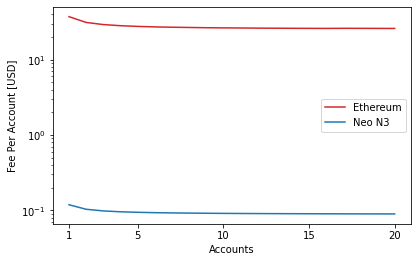

In [11]:
# Plot Ethereum vs. Neo N3 Batched Payout

font = {'size': 10}
plt.rc('font', **font)

safeas = 'batchPayout-eth-vs-neo.pdf'
title = 'Batched Payout Ethereum vs. Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts[:20]
ax1_y = ethBatchPerAccountUSD[:20]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts[:20]
ax2_y = neoBatchPerAccountUSD[:20]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 21, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 20

plt.plot(ax1_x, ax1_y, color = ax1_color, label = "Ethereum")# marker = 'o', markersize = 1, linestyle = "None", dpi = 400)
plt.plot(ax2_x, ax2_y, color = ax2_color, label = "Neo N3")# marker = 'o', markersize = 1, linestyle = "None", dpi = 400)
plt.xlabel("Accounts")
plt.ylabel("Fee Per Account [USD]")

plt.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
plt.legend()

#plt.title(title)
#plt.suptitle(title, y=1.12)
plt.xticks(xaxis_ticks)
plt.yscale('log')
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

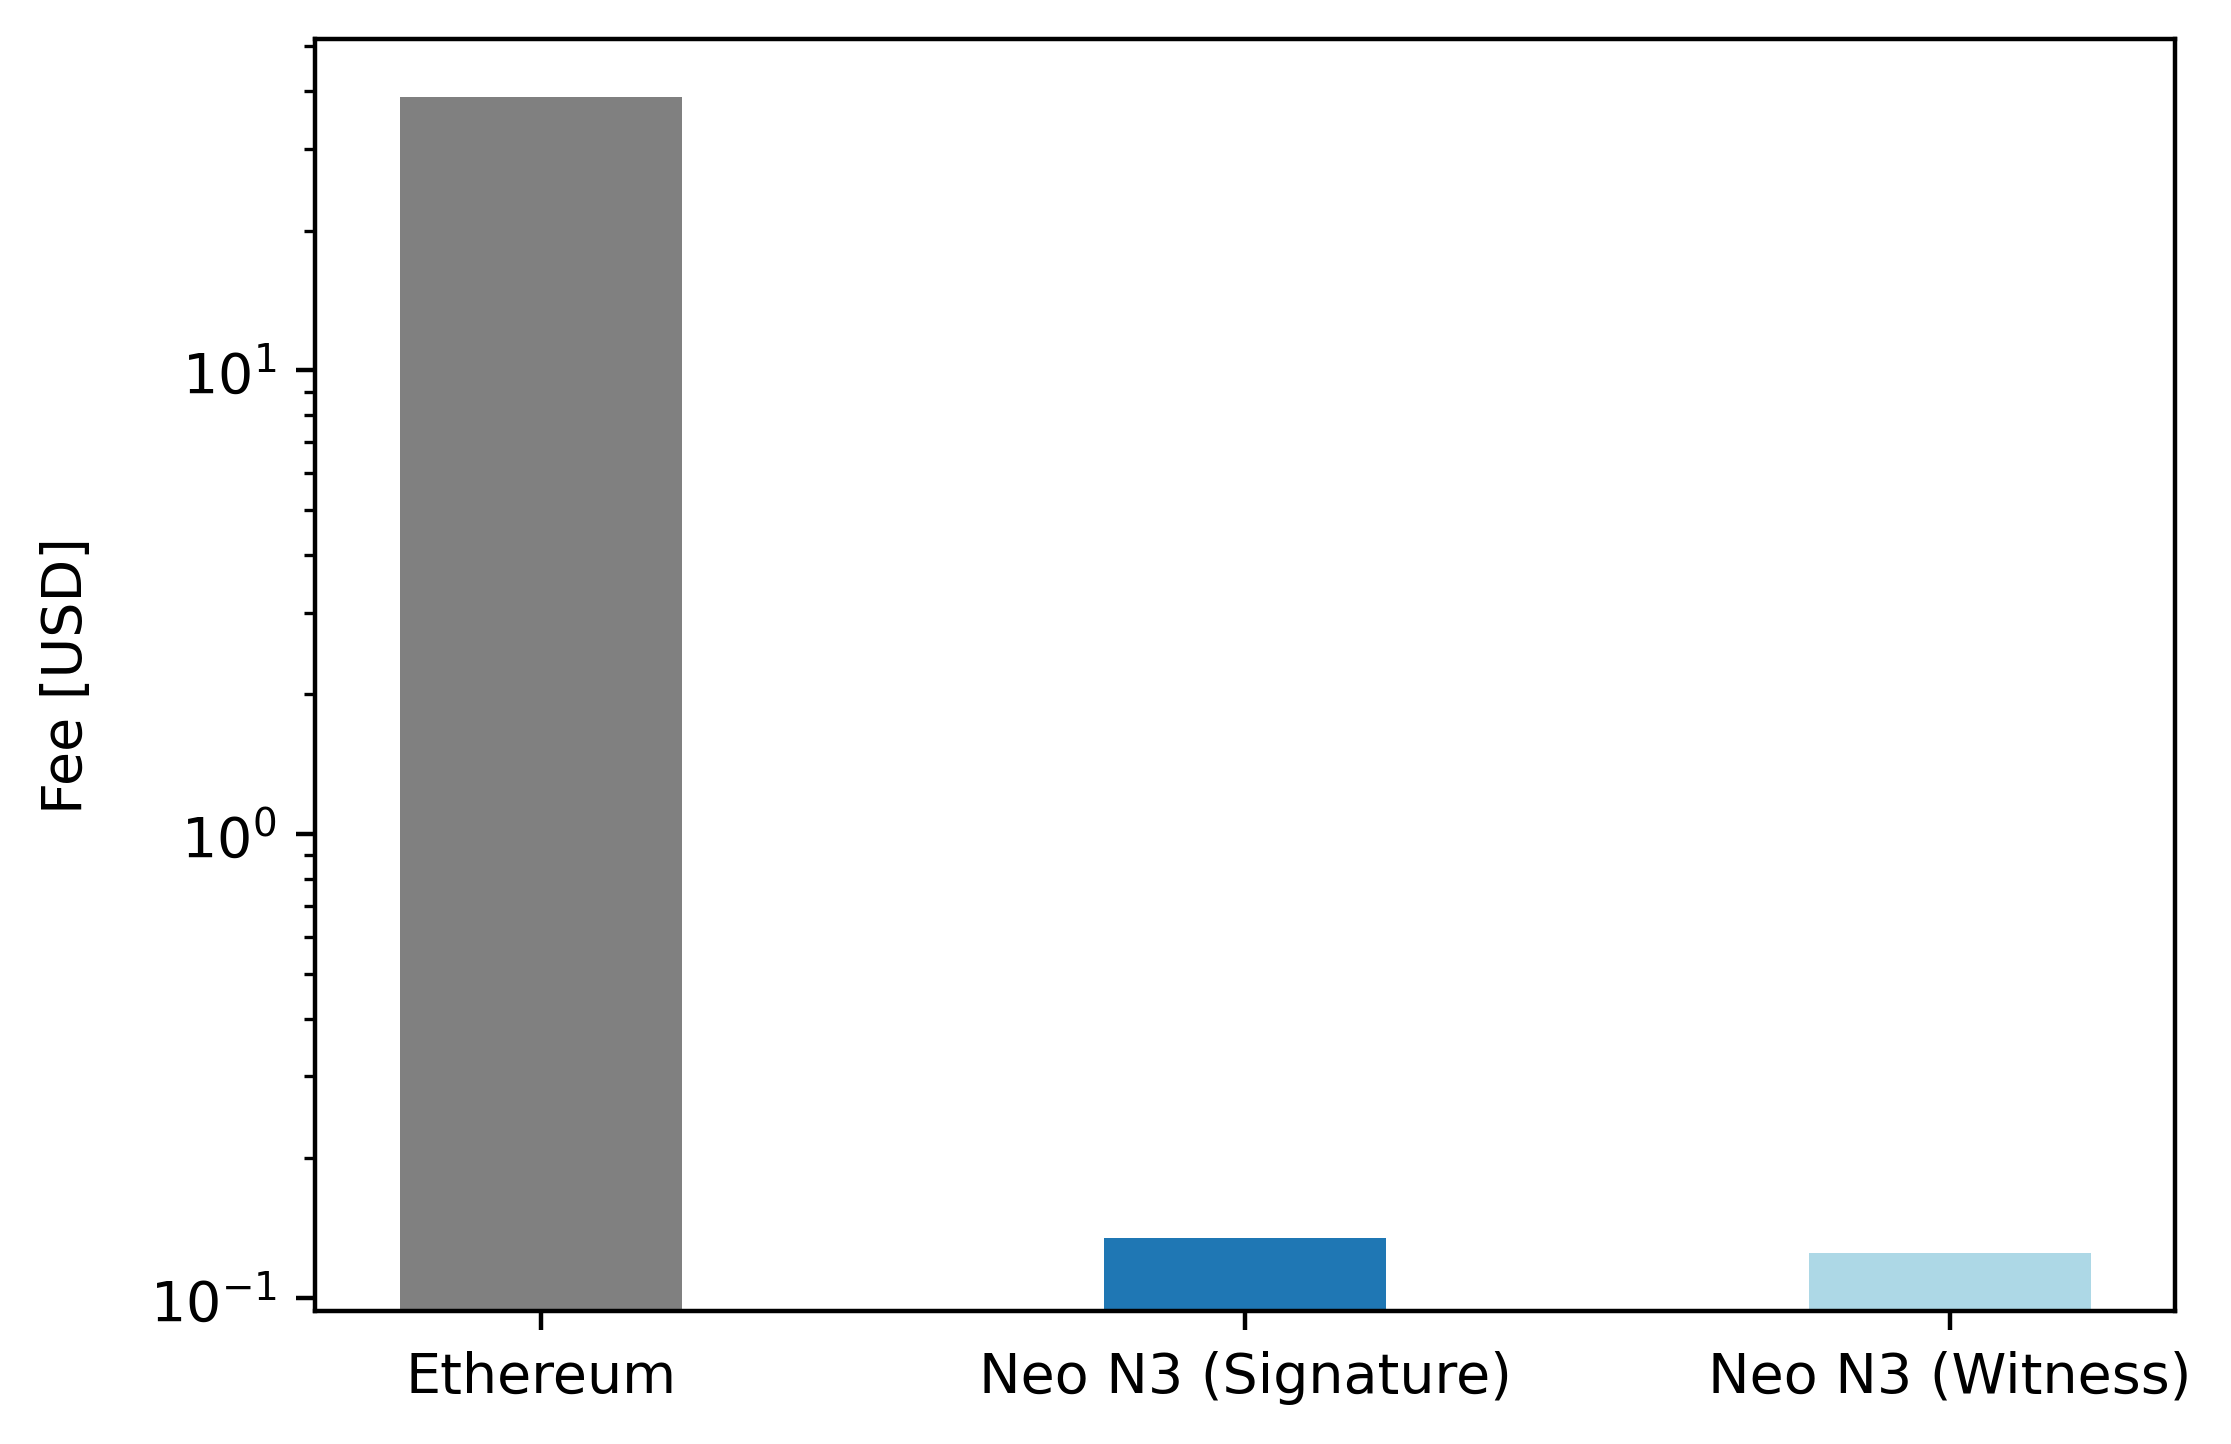

In [12]:
# Plot Withdraw Comparison Ethereum vs. Neo N3 Signature vs. Neo N3 Witness (Logarithmic)

safeas = 'withdraw-comparison-eth-neosig-neowitness-logarithmic.pdf'
title = 'Withdraw Fees'

font = {'size': 10}
plt.rc('font', **font)

bars = []
bars.append(ethWithdrawUSD)
bars.append(neoWithdrawSignatureInt64USD)
bars.append(neoWithdrawWitnessInt64USD)

neobars = []
neobars.append(neoWithdrawSignatureInt64USD)
neobars.append(neoWithdrawWitnessInt64USD)


fig, axes = plt.subplots(1, 1, dpi=400)
fig.subplots_adjust(top=0.92)
colors=['grey', 'tab:blue', 'lightblue']
x = np.arange(3)
ax = axes
ax.bar(x, bars, width = 0.4, color = colors)
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(['Ethereum', 'Neo N3 (Signature)', 'Neo N3 (Witness)'])
ax.set_ylabel('Fee [USD]', labelpad=10)

#plt.suptitle(title)
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

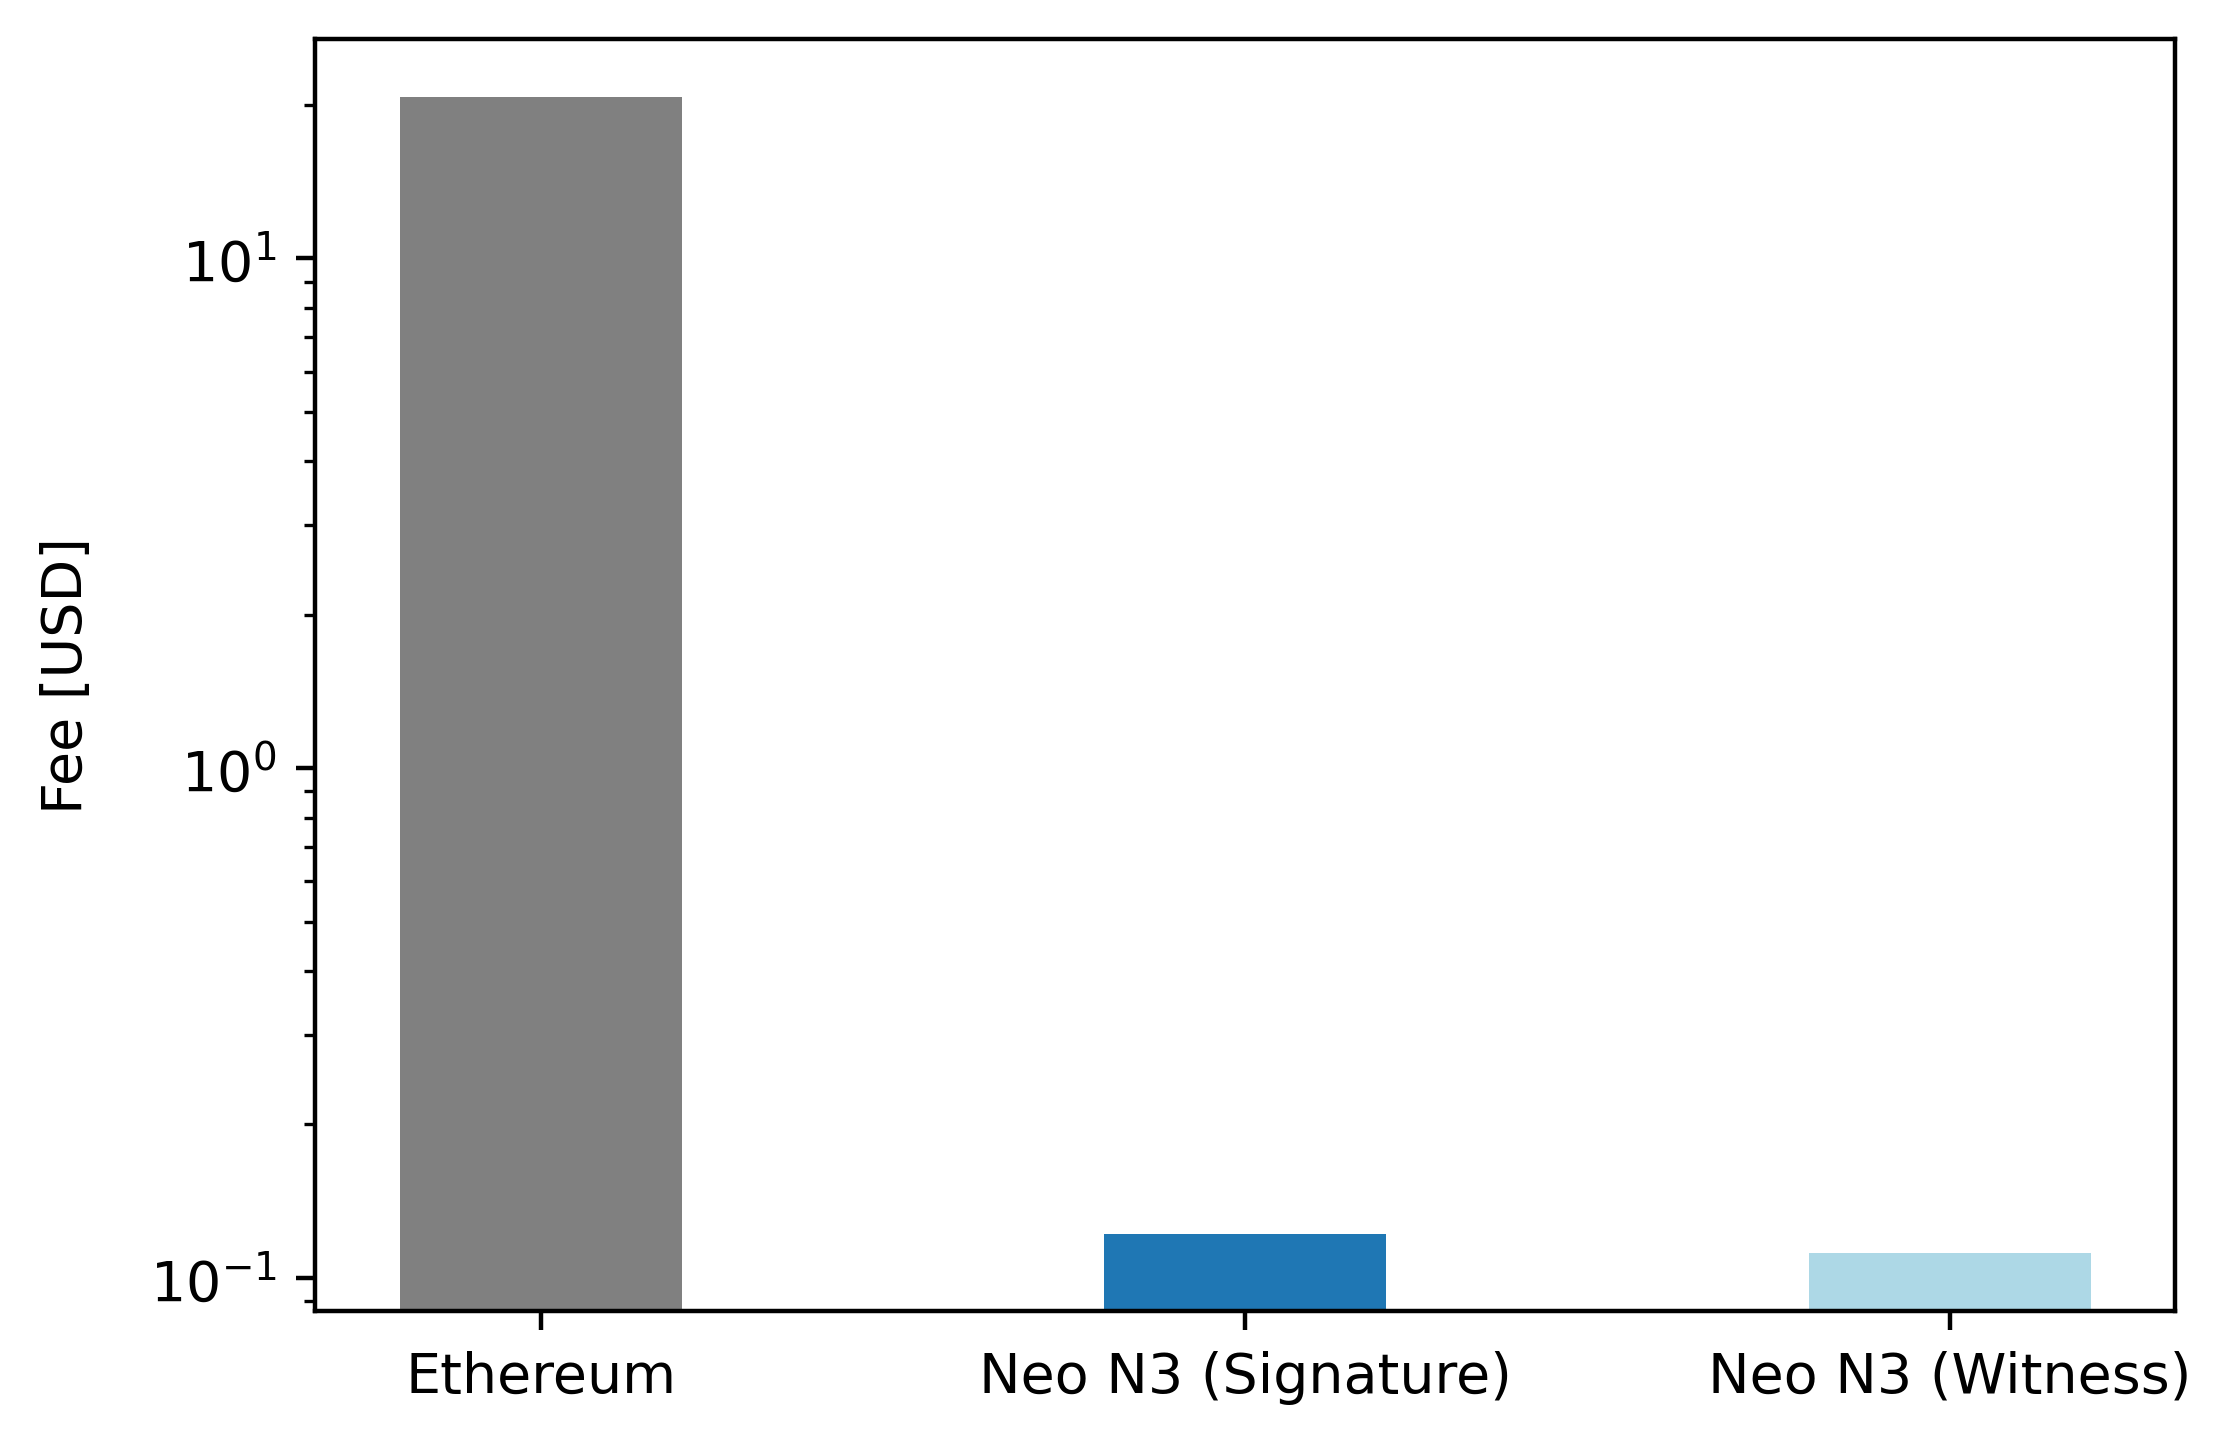

In [13]:
# Plot Withdraw Comparison Ethereum vs. Neo N3 Signature vs. Neo N3 Witness (Logarithmic and with preset values)

safeas = 'withdraw-comparison-eth-neosig-neowitness-preset-logarithmic.pdf'
title = 'Withdraw Fees with preset Values'

font = {'size': 10}
plt.rc('font', **font)

bars = []
bars.append(ethWithdrawPresetUSD)
bars.append(neoWithdrawSignatureInt64PresetUSD)
bars.append(neoWithdrawWitnessInt64PresetUSD)

neobars = []
neobars.append(neoWithdrawSignatureInt64PresetUSD)
neobars.append(neoWithdrawWitnessInt64PresetUSD)


fig, axes = plt.subplots(1, 1, dpi=400)
fig.subplots_adjust(top=0.92)
colors=['grey', 'tab:blue', 'lightblue']
x = np.arange(3)
ax = axes
ax.bar(x, bars, width = 0.4, color = colors)
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(['Ethereum', 'Neo N3 (Signature)', 'Neo N3 (Witness)'])
ax.set_ylabel('Fee [USD]', labelpad=10)

#plt.suptitle(title)
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

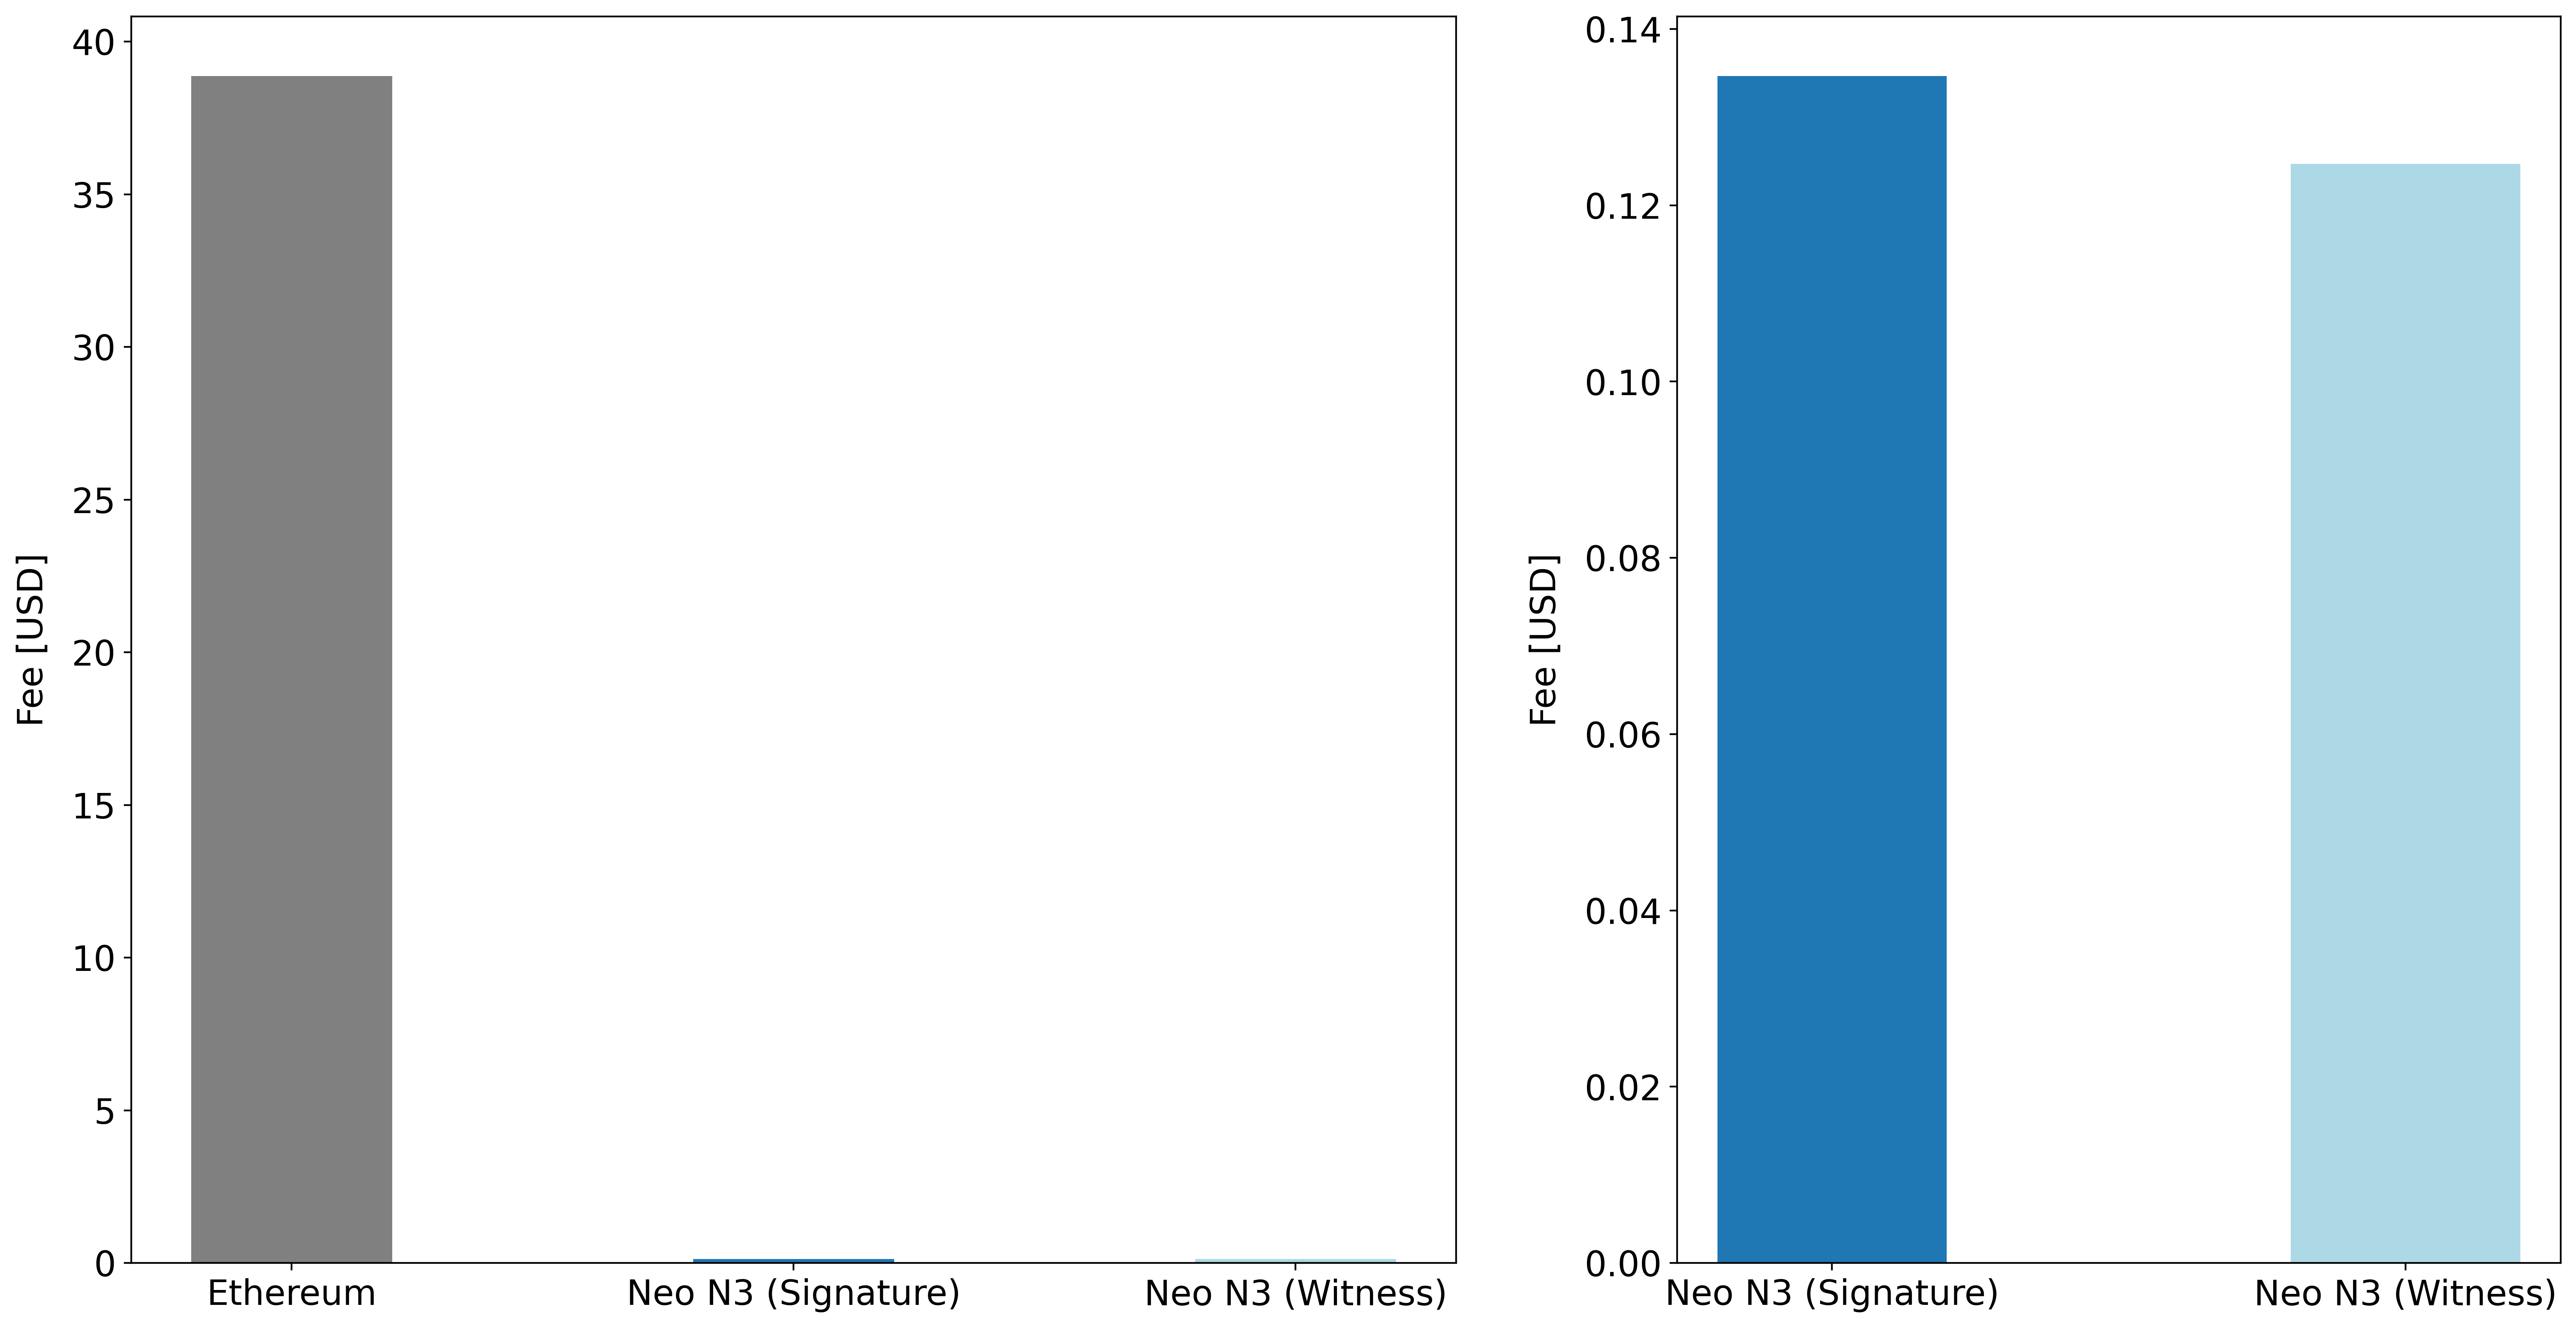

In [14]:
# Plot Withdraw Comparison Ethereum vs. Neo N3 Signature vs. Neo N3 Witness

safeas = 'withdraw-comparison-eth-neosig-neowitness.pdf'
title = 'Withdraw Fees'

font = {'size': 16}
plt.rc('font', **font)

bars = []
bars.append(ethWithdrawUSD)
bars.append(neoWithdrawSignatureInt64USD)
bars.append(neoWithdrawWitnessInt64USD)

neobars = []
neobars.append(neoWithdrawSignatureInt64USD)
neobars.append(neoWithdrawWitnessInt64USD)


fig, axes = plt.subplots(1, 2, figsize = (20, 10), gridspec_kw={'width_ratios': [3, 2]}, dpi=400)
fig.subplots_adjust(top=0.92)
colors=['grey', 'tab:blue', 'lightblue']
x = np.arange(3)
axLeft = axes[0]
axLeft.bar(x, bars, width = 0.4, color = colors)
axLeft.set_xticks(x)
axLeft.set_xticklabels(['Ethereum', 'Neo N3 (Signature)', 'Neo N3 (Witness)'])
axLeft.set_ylabel('Fee [USD]', labelpad=10)

axRight = axes[1]
colors=['tab:blue', 'lightblue']
x = np.arange(2)
axRight.bar(x, neobars, width = 0.4, color = colors)
axRight.set_xticks(x)
axRight.set_xticklabels(['Neo N3 (Signature)', 'Neo N3 (Witness)'])
axRight.set_ylabel('Fee [USD]', labelpad=10)

#plt.suptitle(title)
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

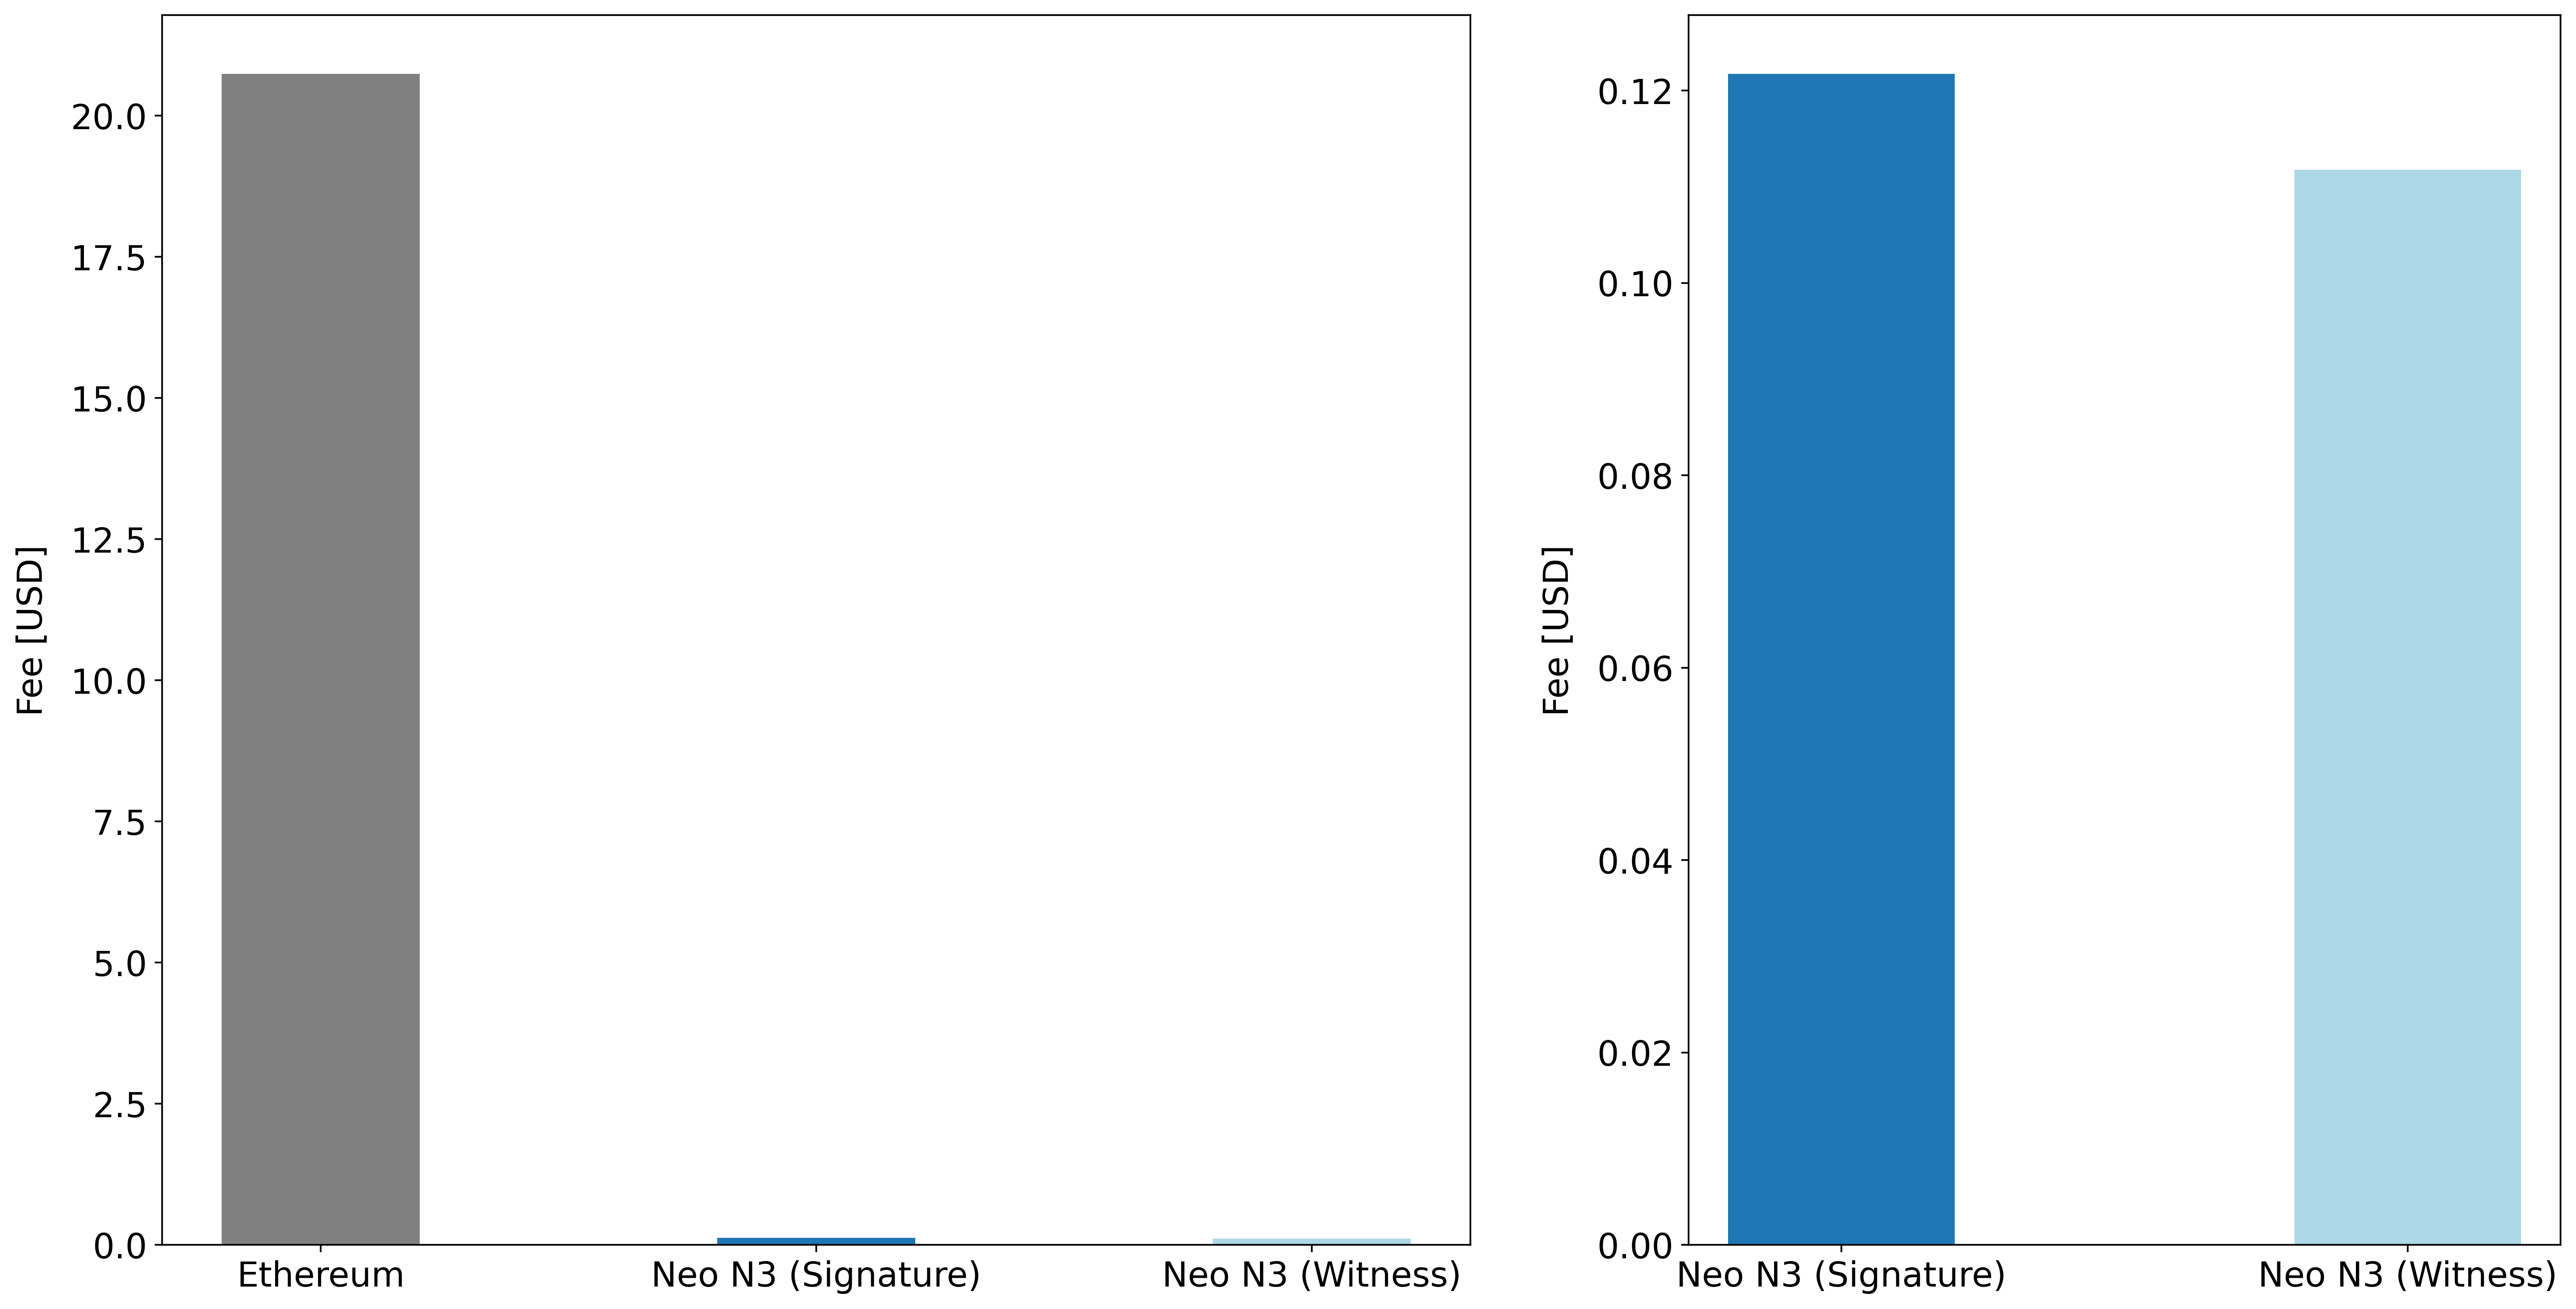

In [15]:
# Plot Withdraw Comparison Ethereum vs. Neo N3 Signature vs. Neo N3 Witness (with preset values)

safeas = 'withdraw-comparison-eth-neosig-neowitness-preset.pdf'
title = 'Withdraw Fees with preset Values'

font = {'size': 16}
plt.rc('font', **font)

bars = []
bars.append(ethWithdrawPresetUSD)
bars.append(neoWithdrawSignatureInt64PresetUSD)
bars.append(neoWithdrawWitnessInt64PresetUSD)

neobars = []
neobars.append(neoWithdrawSignatureInt64PresetUSD)
neobars.append(neoWithdrawWitnessInt64PresetUSD)


fig, axes = plt.subplots(1, 2, figsize = (20, 10), gridspec_kw={'width_ratios': [3, 2]}, dpi=400)
fig.subplots_adjust(top=0.92)
colors=['grey', 'tab:blue', 'lightblue']
x = np.arange(3)
axLeft = axes[0]
axLeft.bar(x, bars, width = 0.4, color = colors)
axLeft.set_xticks(x)
axLeft.set_xticklabels(['Ethereum', 'Neo N3 (Signature)', 'Neo N3 (Witness)'])
axLeft.set_ylabel('Fee [USD]', labelpad=10)

axRight = axes[1]
colors=['tab:blue', 'lightblue']
x = np.arange(2)
axRight.bar(x, neobars, width = 0.4, color = colors)
axRight.set_xticks(x)
axRight.set_xticklabels(['Neo N3 (Signature)', 'Neo N3 (Witness)'])
axRight.set_ylabel('Fee [USD]', labelpad=10)

#plt.suptitle(title)
plt.savefig('plots/' + safeas, dpi=400)
plt.show()

In [16]:
# Multi-bar plot (1/5/10/20/40/500 developers) per developer - Data Calculations

multibar_ethBatchUSD = []
multibar_ethWithdrawUSD = []
multibar_neoBatchUSD = []
multibar_neoWithdrawSignatureUSD = []
multibar_neoWithdrawWitnessUSD = []

multibar_ethBatchPresetUSD = []
multibar_ethWithdrawPresetUSD = []
multibar_neoBatchPresetUSD = []
multibar_neoWithdrawSignaturePresetUSD = []
multibar_neoWithdrawWitnessPresetUSD = []

variations = [1, 5, 10, 20, 40, 500]
for i in variations:
    ethIndex = ethAccounts.index(i)
    multibar_ethBatchUSD.append(ethBatchPerAccountUSD[ethIndex])
    multibar_ethBatchPresetUSD.append(ethBatchPresetPerAccountUSD[ethIndex])
    multibar_ethWithdrawUSD.append(ethWithdrawUSD)
    multibar_ethWithdrawPresetUSD.append(ethWithdrawPresetUSD)
    
    neoIndex = neoAccounts.index(i)
    multibar_neoBatchUSD.append(neoBatchPerAccountUSD[neoIndex])
    multibar_neoBatchPresetUSD.append(neoBatchPresetPerAccountUSD[neoIndex])
    multibar_neoWithdrawSignatureUSD.append(neoWithdrawSignatureInt64USD)
    multibar_neoWithdrawSignaturePresetUSD.append(neoWithdrawSignatureInt64PresetUSD)
    multibar_neoWithdrawWitnessUSD.append(neoWithdrawWitnessInt64USD)
    multibar_neoWithdrawWitnessPresetUSD.append(neoWithdrawWitnessInt64PresetUSD)


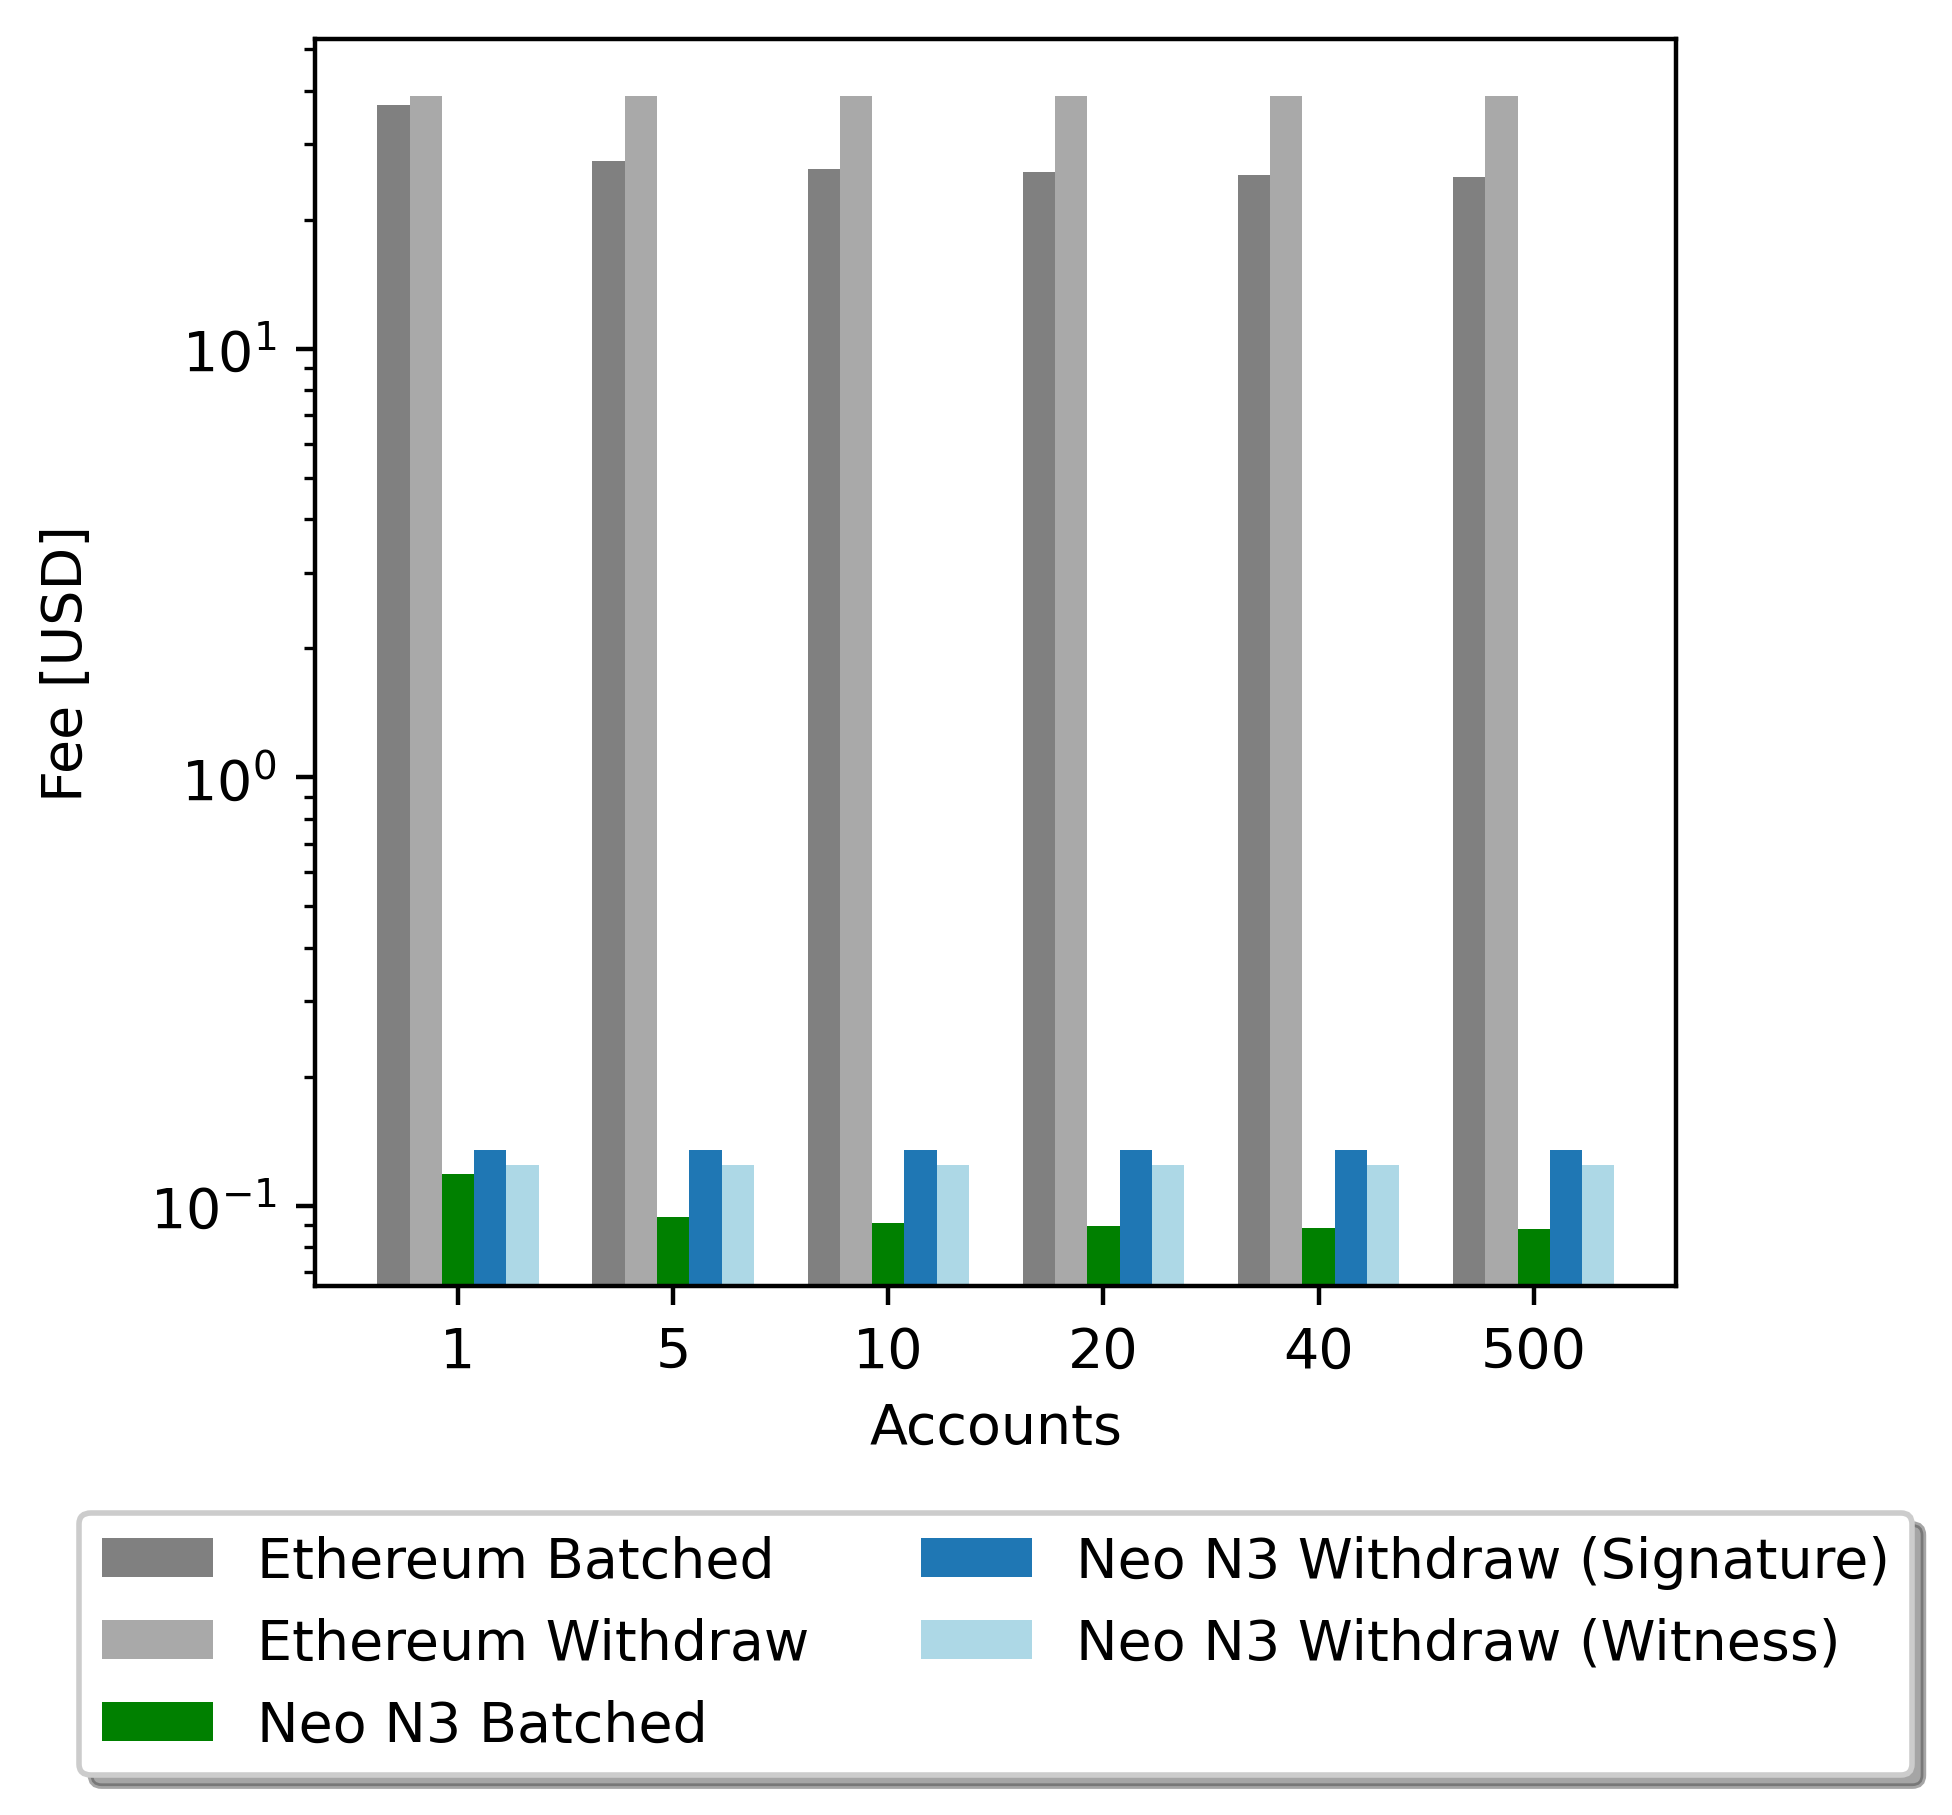

In [73]:
# Multi-bar plot

title = 'Payout Comparison'
safeas = 'payout-comparison-log.pdf'

font = {'size': 10}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 1, figsize = (5, 5), dpi=400)

N = len(variations)
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

ax = axes
xticklabels = (str(variations[0]), str(variations[1]), str(variations[2]), str(variations[3]), str(variations[4]), str(variations[5]))

rects1 = ax.bar(ind-width, multibar_ethBatchUSD, width, color='grey')
rects2 = ax.bar(ind, multibar_ethWithdrawUSD, width, color='darkgrey')
rects3 = ax.bar(ind+width, multibar_neoBatchUSD, width, color='green')
rects4 = ax.bar(ind+width*2, multibar_neoWithdrawSignatureUSD, width, color='tab:blue')
rects5 = ax.bar(ind+width*3, multibar_neoWithdrawWitnessUSD, width, color='lightblue')

ax.set_ylabel('Fee [USD]', labelpad=10)
ax.set_yscale('log')
ax.set_xticks(ind+width)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Accounts')
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),
              ('Ethereum Batched', 'Ethereum Withdraw', 'Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.16), fancybox=True, shadow=True, ncol=2)

plt.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped

#plt.title(title)
plt.savefig('plots/' + safeas, dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.show()

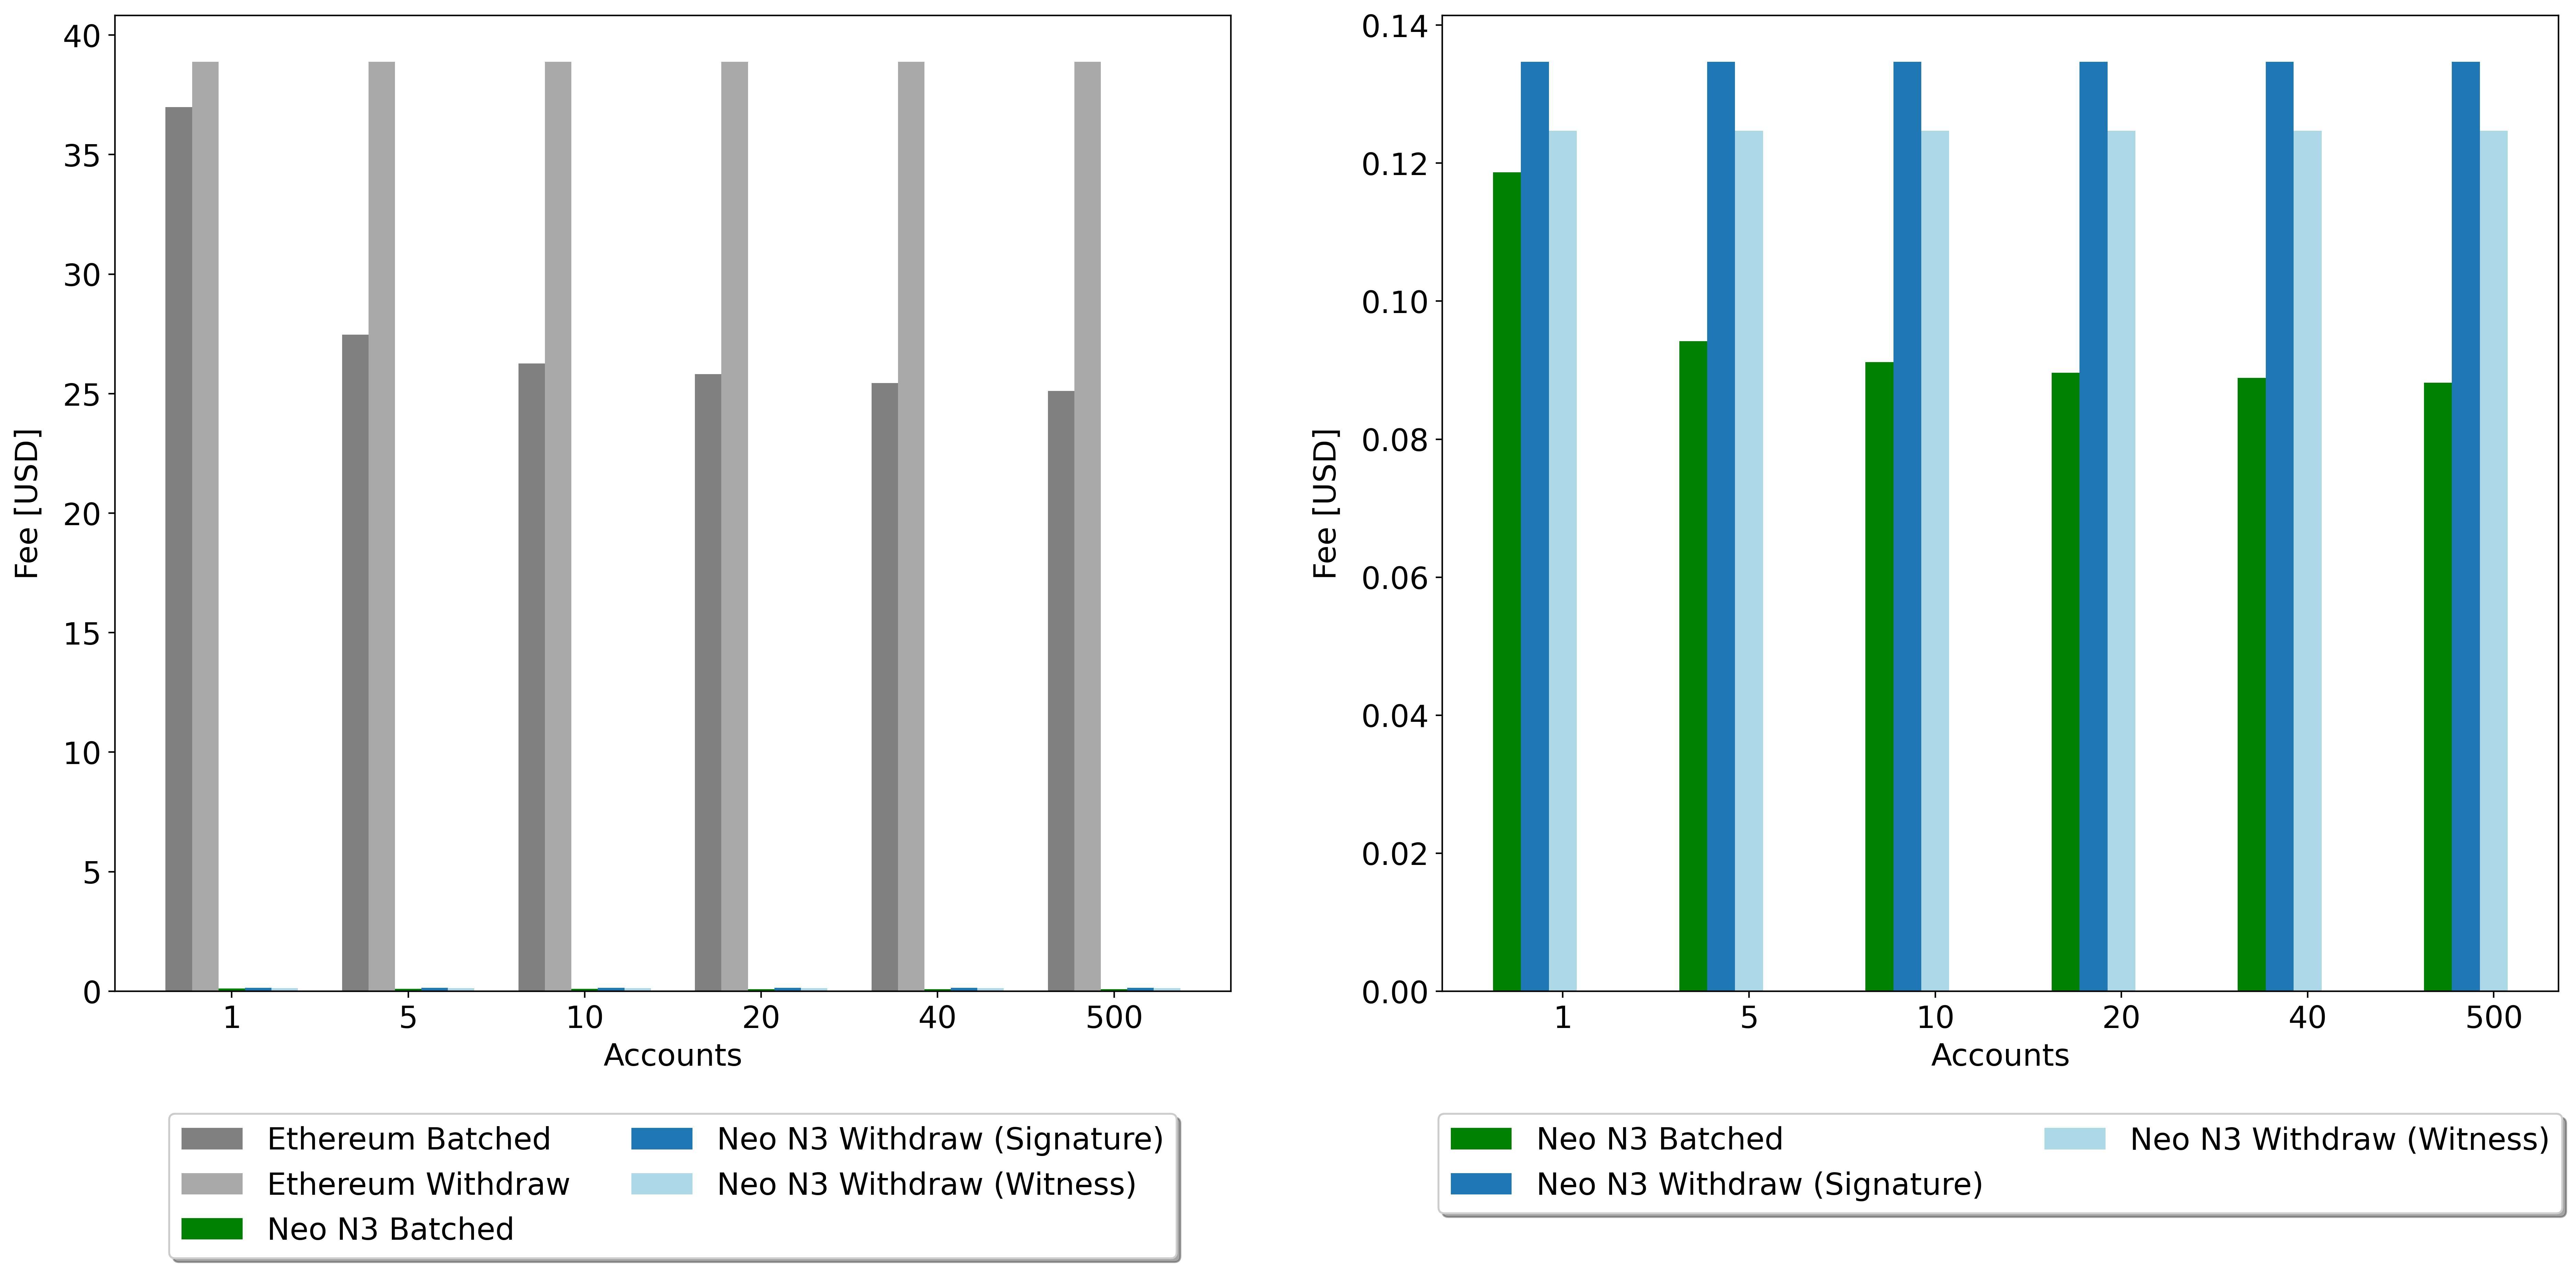

In [74]:
# Multi-bar plot

title = 'Payout Comparison'
safeas = 'payout-comparison.pdf'

font = {'size': 16}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 2, figsize = (20, 10), dpi=400)

N = len(variations)
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

axLeft = axes[0]
xticklabels = (str(variations[0]), str(variations[1]), str(variations[2]), str(variations[3]), str(variations[4]), str(variations[5]))

rects1 = axLeft.bar(ind-width, multibar_ethBatchUSD, width, color='grey')
rects2 = axLeft.bar(ind, multibar_ethWithdrawUSD, width, color='darkgrey')
rects3 = axLeft.bar(ind+width, multibar_neoBatchUSD, width, color='green')
rects4 = axLeft.bar(ind+width*2, multibar_neoWithdrawSignatureUSD, width, color='tab:blue')
rects5 = axLeft.bar(ind+width*3, multibar_neoWithdrawWitnessUSD, width, color='lightblue')

axLeft.set_ylabel('Fee [USD]', labelpad=10)
axLeft.set_xticks(ind+width)
axLeft.set_xticklabels(xticklabels)
axLeft.set_xlabel('Accounts')
axLeft.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),
              ('Ethereum Batched', 'Ethereum Withdraw', 'Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=2)

axRight = axes[1]

rects3 = axRight.bar(ind-width, multibar_neoBatchUSD, width, color='green')
rects4 = axRight.bar(ind, multibar_neoWithdrawSignatureUSD, width, color='tab:blue')
rects5 = axRight.bar(ind+width, multibar_neoWithdrawWitnessUSD, width, color='lightblue')

axRight.set_ylabel('Fee [USD]', labelpad=10)
axRight.set_xticks(ind+width)
axRight.set_xticklabels(xticklabels)
axRight.set_xlabel('Accounts')

axRight.legend((rects3[0], rects4[0], rects5[0]),
              ('Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=2)

plt.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped

#plt.suptitle(title, y=1.02)
plt.savefig('plots/' + safeas, dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.show()

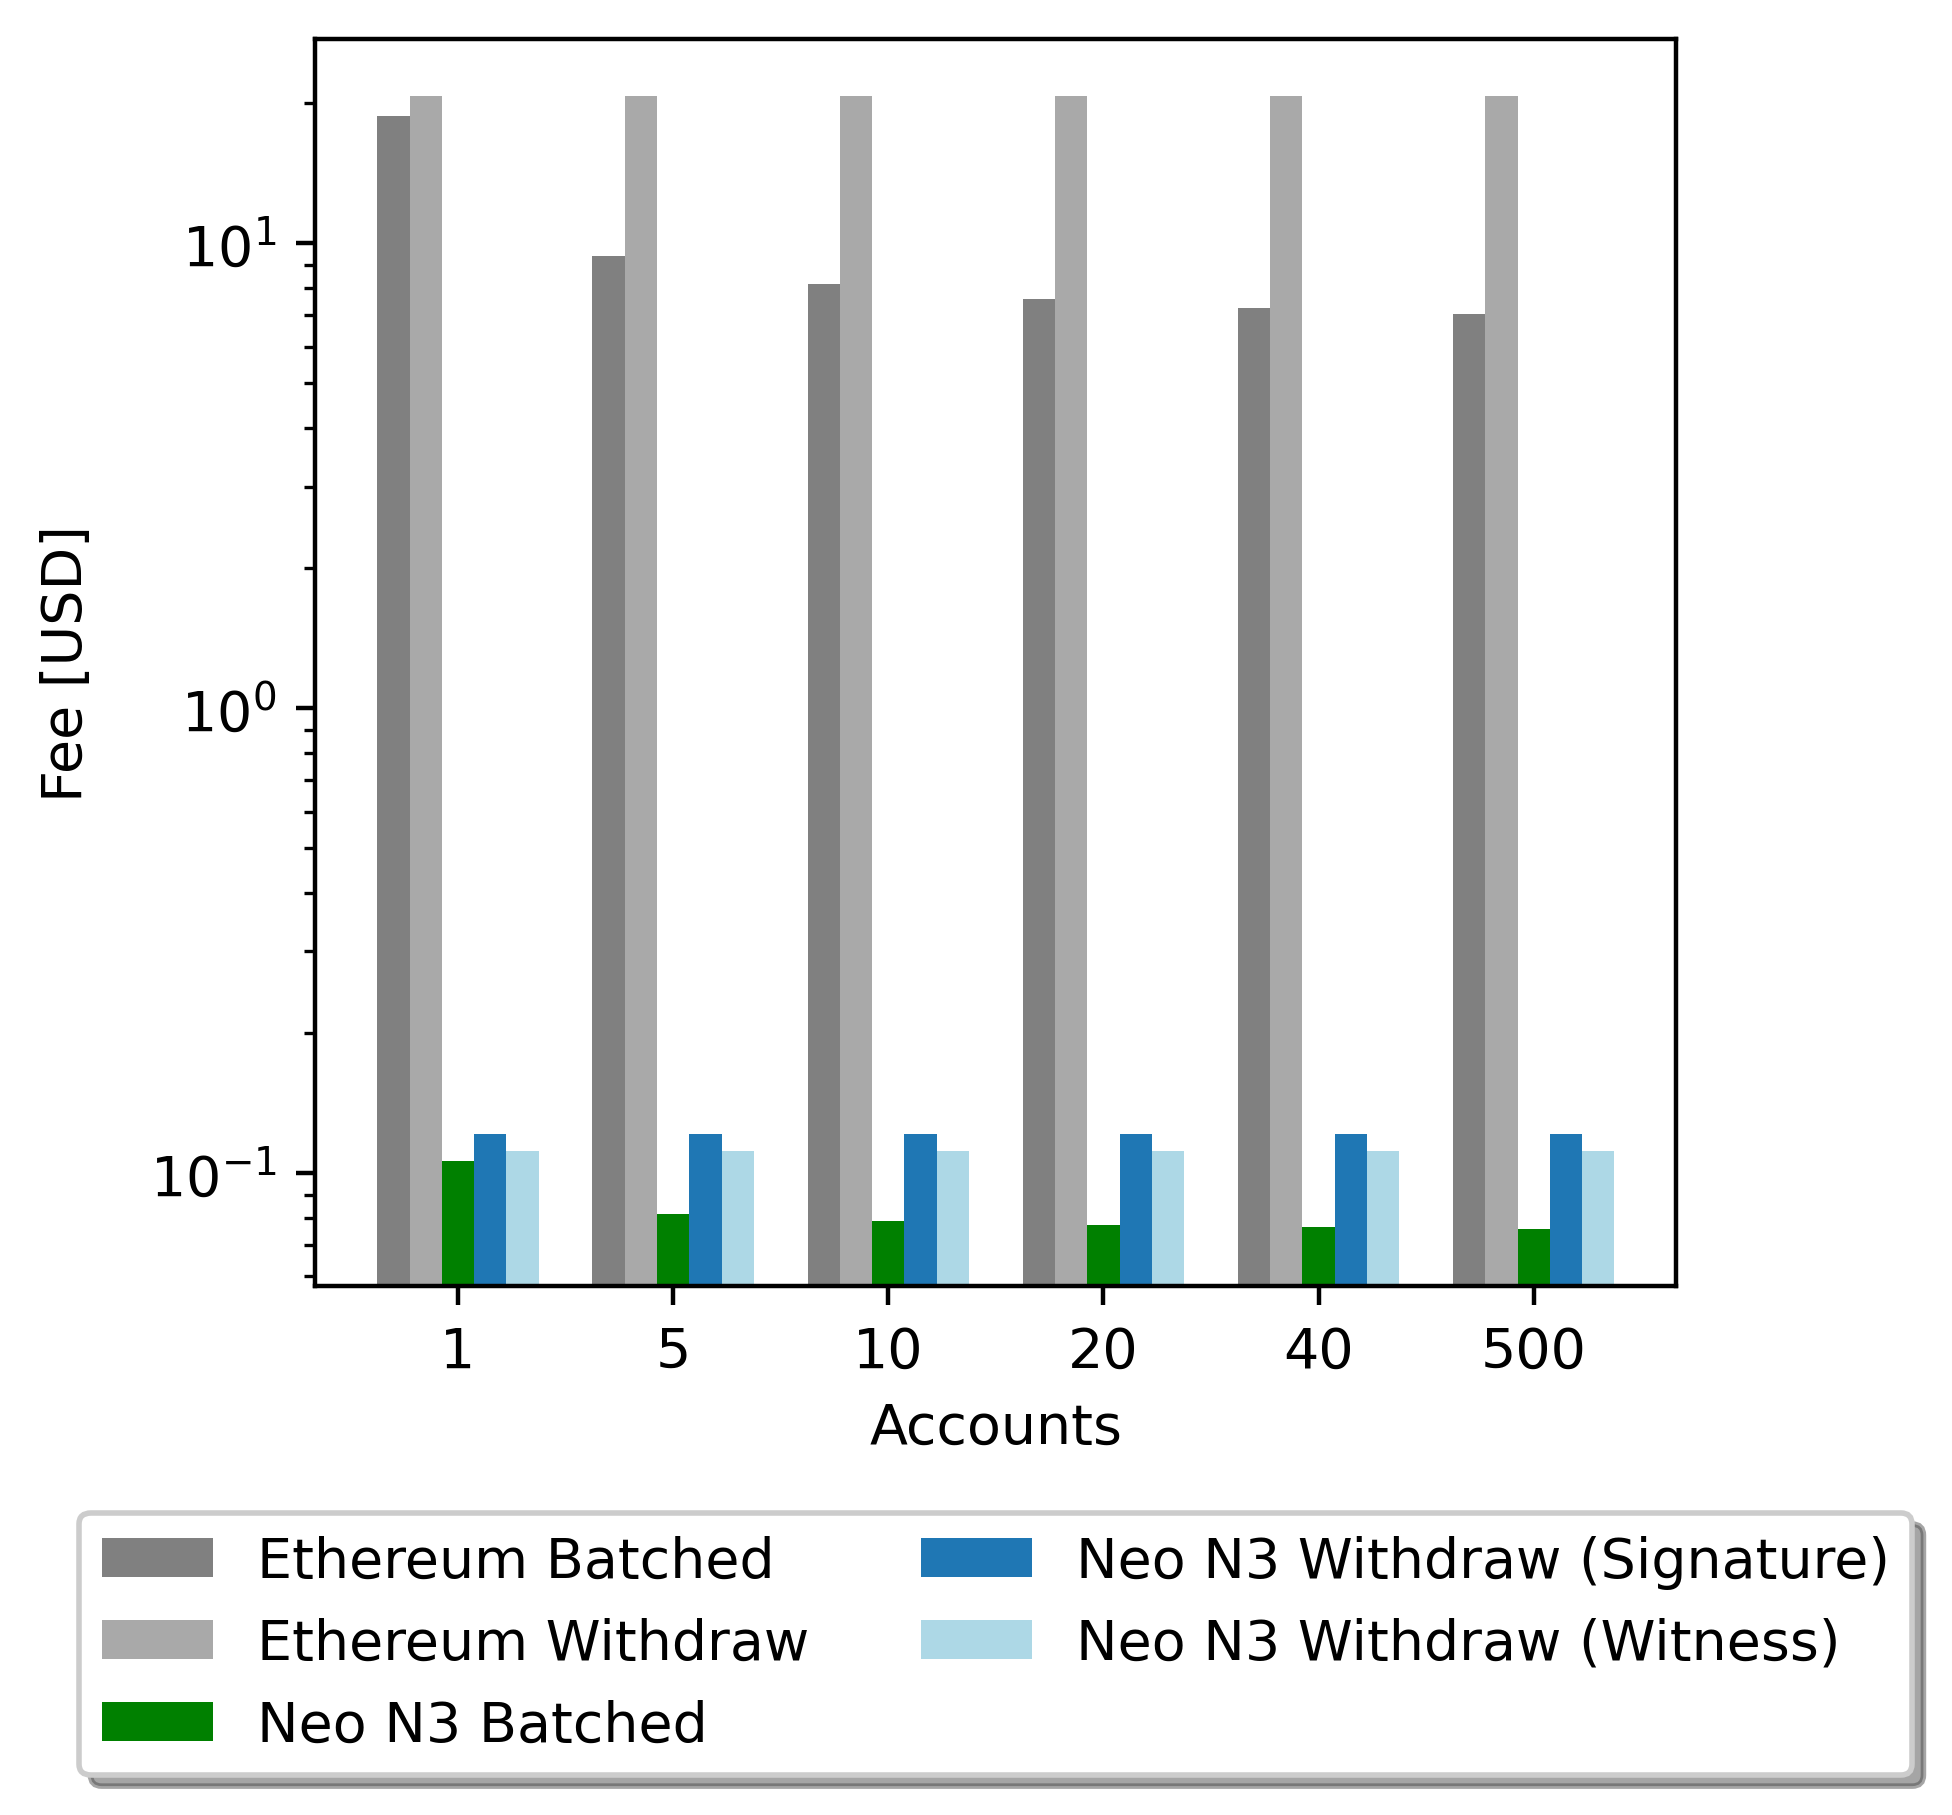

In [75]:
# Multi-bar plot with preset values

title = 'Payout Comparison with preset Values'
safeas = 'payout-comparison-preset-log.pdf'

font = {'size': 10}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 1, figsize = (5, 5), dpi=400)

N = len(variations)
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

ax = axes
xticklabels = (str(variations[0]), str(variations[1]), str(variations[2]), str(variations[3]), str(variations[4]), str(variations[5]))

rects1 = ax.bar(ind-width, multibar_ethBatchPresetUSD, width, color='grey')
rects2 = ax.bar(ind, multibar_ethWithdrawPresetUSD, width, color='darkgrey')
rects3 = ax.bar(ind+width, multibar_neoBatchPresetUSD, width, color='green')
rects4 = ax.bar(ind+width*2, multibar_neoWithdrawSignaturePresetUSD, width, color='tab:blue')
rects5 = ax.bar(ind+width*3, multibar_neoWithdrawWitnessPresetUSD, width, color='lightblue')

ax.set_ylabel('Fee [USD]', labelpad=10)
ax.set_yscale('log')
ax.set_xticks(ind+width)
ax.set_xticklabels(xticklabels)
ax.set_xlabel('Accounts')
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),
              ('Ethereum Batched', 'Ethereum Withdraw', 'Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.16), fancybox=True, shadow=True, ncol=2)

plt.tight_layout(pad = 2)  # otherwise the right y-label is slightly clipped

#plt.title(title)
plt.savefig('plots/' + safeas, dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.show()

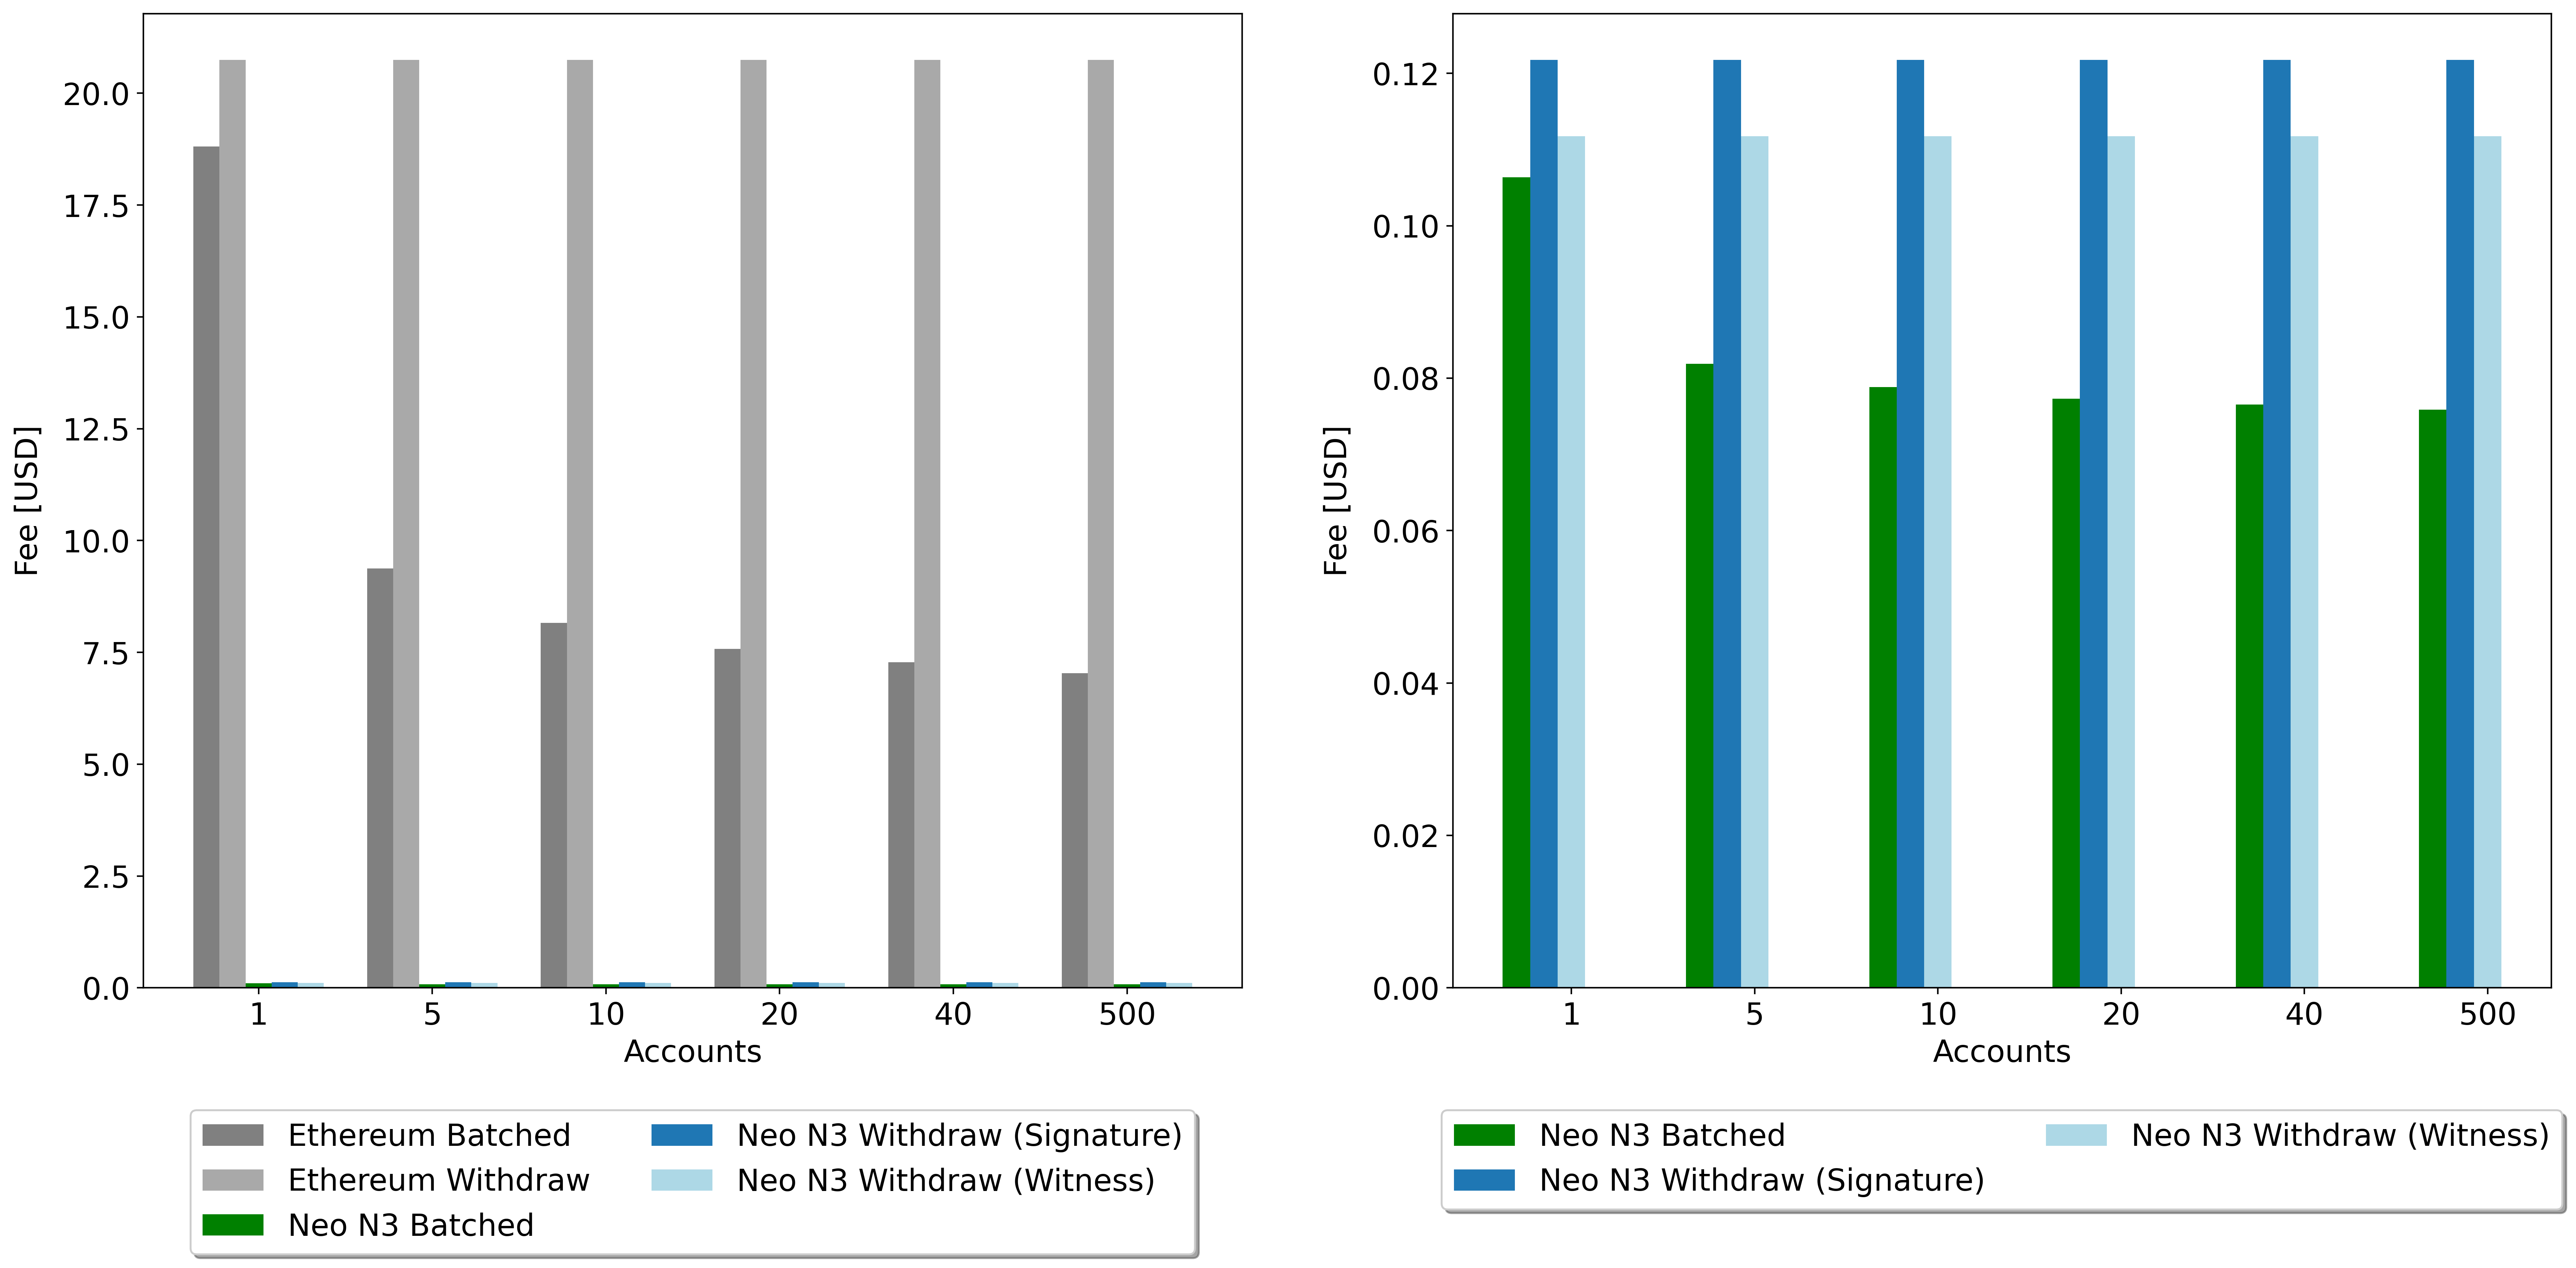

In [77]:
# Multi-bar plot with preset values

title = 'Payout Comparison with preset Values'
safeas = 'payout-comparison-preset.pdf'

font = {'size': 16}
plt.rc('font', **font)

fig, axes = plt.subplots(1, 2, figsize = (20, 10), dpi=400)

N = len(variations)
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

axLeft = axes[0]
xticklabels = (str(variations[0]), str(variations[1]), str(variations[2]), str(variations[3]), str(variations[4]), str(variations[5]))

rects1 = axLeft.bar(ind-width, multibar_ethBatchPresetUSD, width, color='grey')
rects2 = axLeft.bar(ind, multibar_ethWithdrawPresetUSD, width, color='darkgrey')
rects3 = axLeft.bar(ind+width, multibar_neoBatchPresetUSD, width, color='green')
rects4 = axLeft.bar(ind+width*2, multibar_neoWithdrawSignaturePresetUSD, width, color='tab:blue')
rects5 = axLeft.bar(ind+width*3, multibar_neoWithdrawWitnessPresetUSD, width, color='lightblue')

axLeft.set_ylabel('Fee [USD]', labelpad=10)
axLeft.set_xticks(ind+width)
axLeft.set_xticklabels(xticklabels)
axLeft.set_xlabel('Accounts')
axLeft.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),
              ('Ethereum Batched', 'Ethereum Withdraw', 'Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=2)

axRight = axes[1]

rects3 = axRight.bar(ind-width, multibar_neoBatchPresetUSD, width, color='green')
rects4 = axRight.bar(ind, multibar_neoWithdrawSignaturePresetUSD, width, color='tab:blue')
rects5 = axRight.bar(ind+width, multibar_neoWithdrawWitnessPresetUSD, width, color='lightblue')

axRight.set_ylabel('Fee [USD]', labelpad=10)
axRight.set_xticks(ind+width)
axRight.set_xticklabels(xticklabels)
axRight.set_xlabel('Accounts')

axRight.legend((rects3[0], rects4[0], rects5[0]),
              ('Neo N3 Batched', 'Neo N3 Withdraw (Signature)', 'Neo N3 Withdraw (Witness)'),
              loc=9, bbox_to_anchor=(0.5, -0.11), fancybox=True, shadow=True, ncol=2)

plt.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
#plt.suptitle(title, y=1.02)
plt.savefig('plots/' + safeas, dpi=400, bbox_inches='tight', pad_inches=0.1)
plt.show()

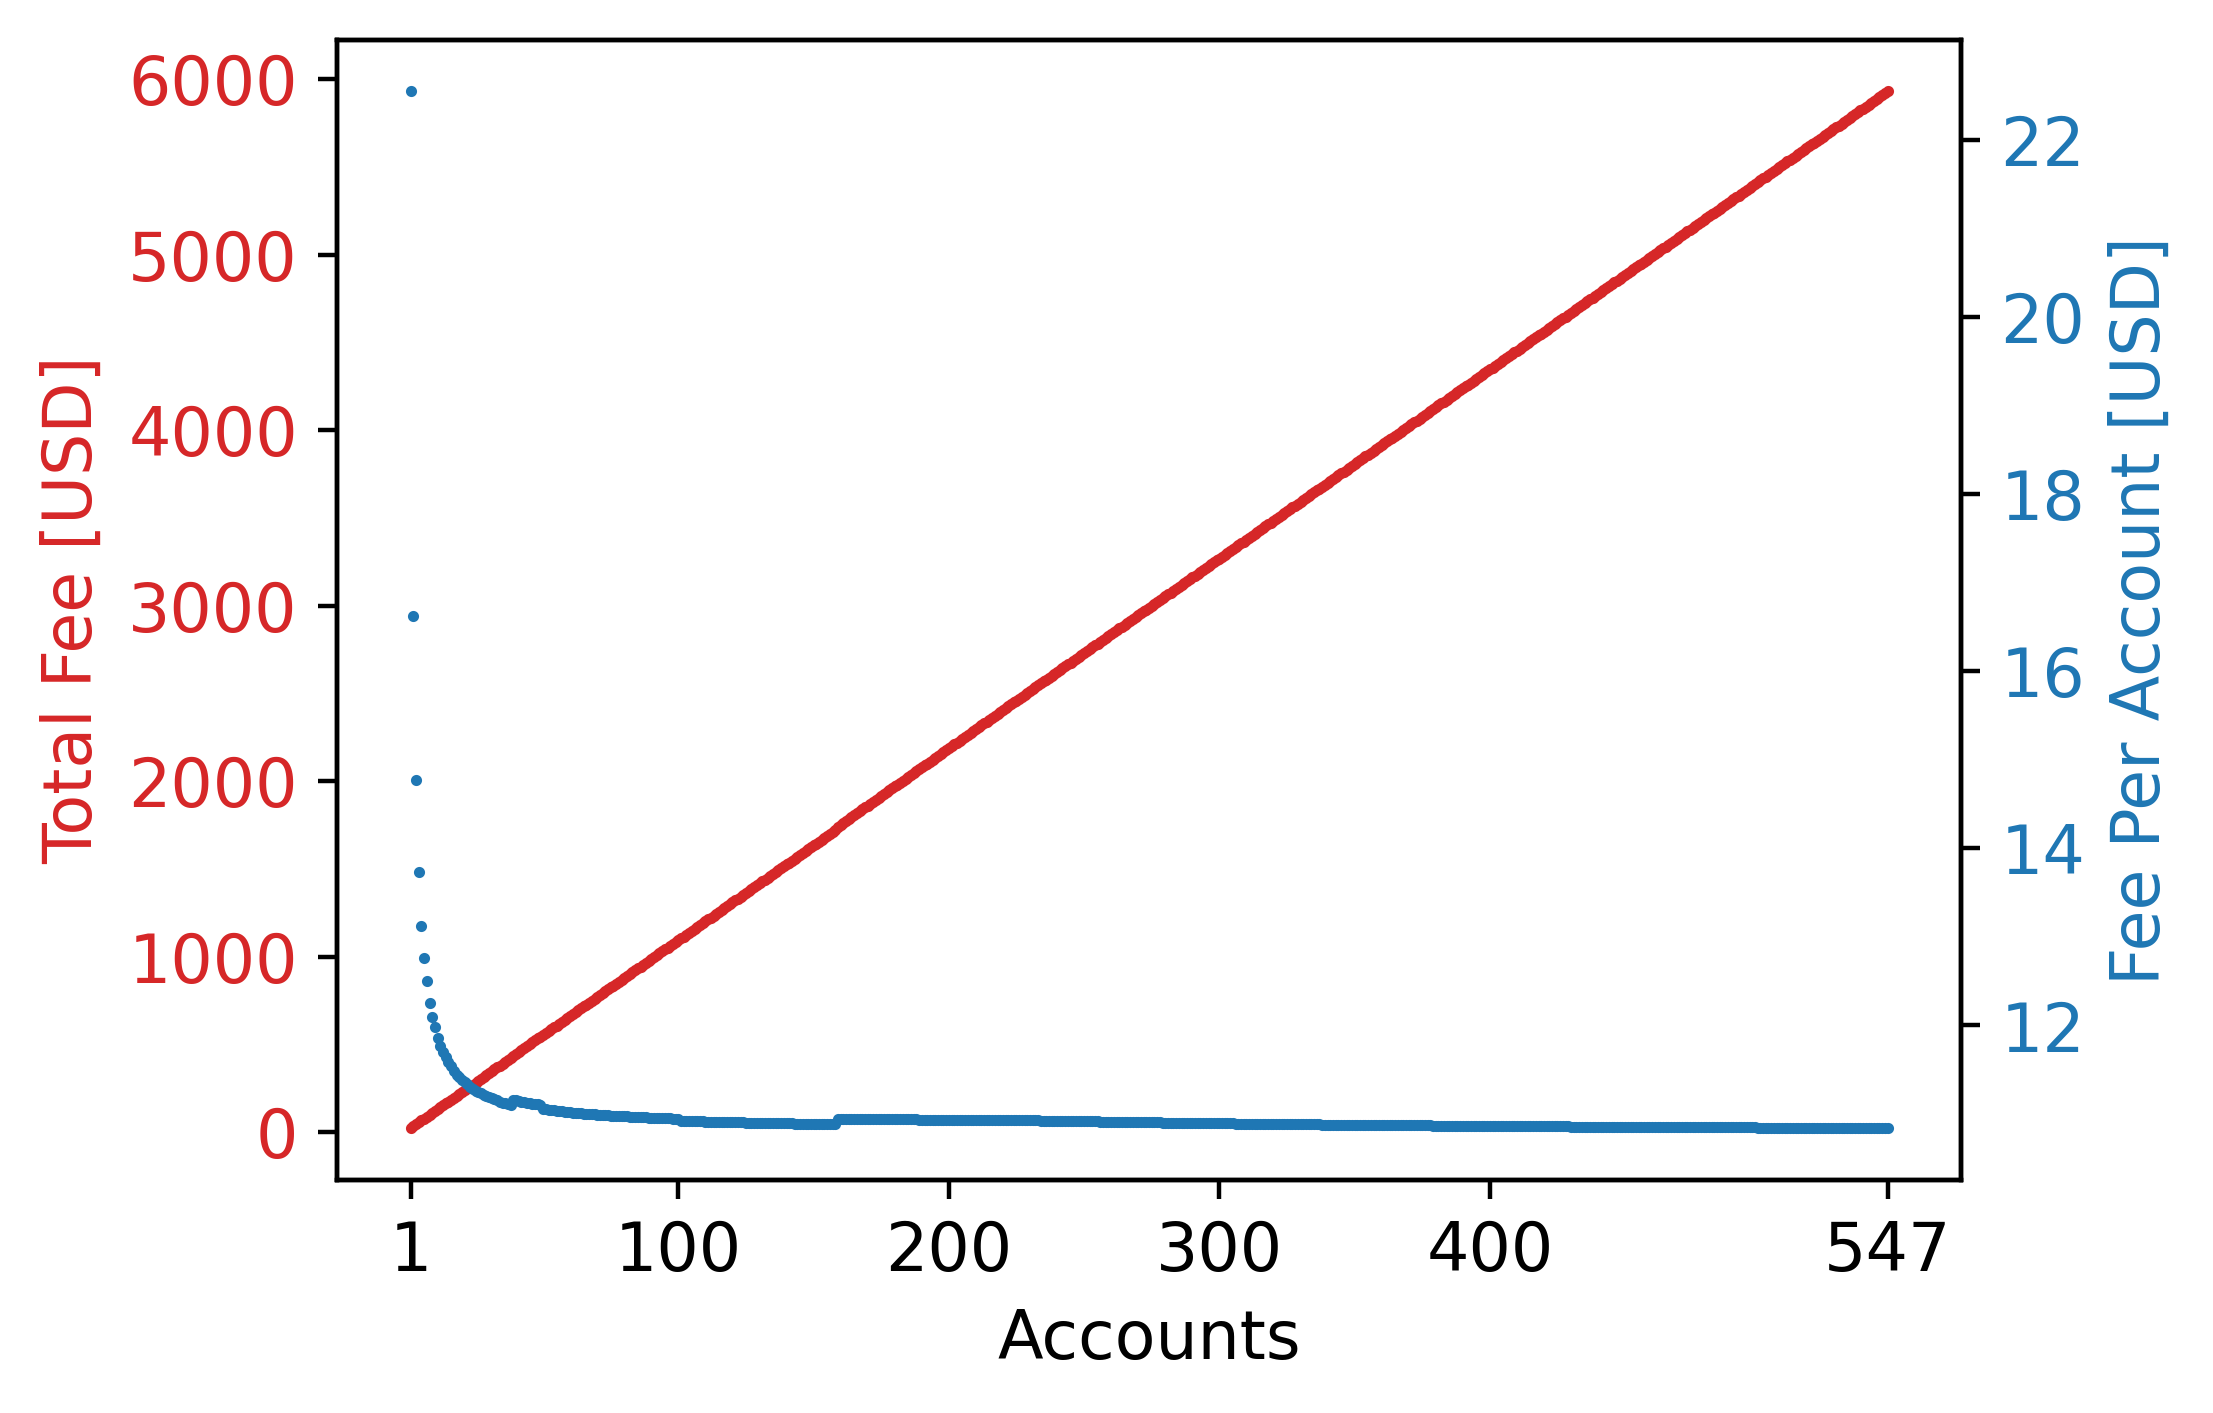

In [81]:
font = {'size': 12}
plt.rc('font', **font)

safeas = 'former-payout-fill.pdf'
title = 'Former Solution Fill'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = formerAccounts
ax1_y = formerFillUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = formerAccounts
ax2_y = formerFillPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 551, 100)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 547


fig, ax1 = plt.subplots(dpi=400)
color = ax1_color
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ax1_ylabel, color=color)
ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = ax2_color
ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
ax1.set(xticks=xaxis_ticks)#, title=title)

fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
plt.savefig('plots/' + safeas, bbox_inches='tight', pad_inches=0.1)
plt.show()

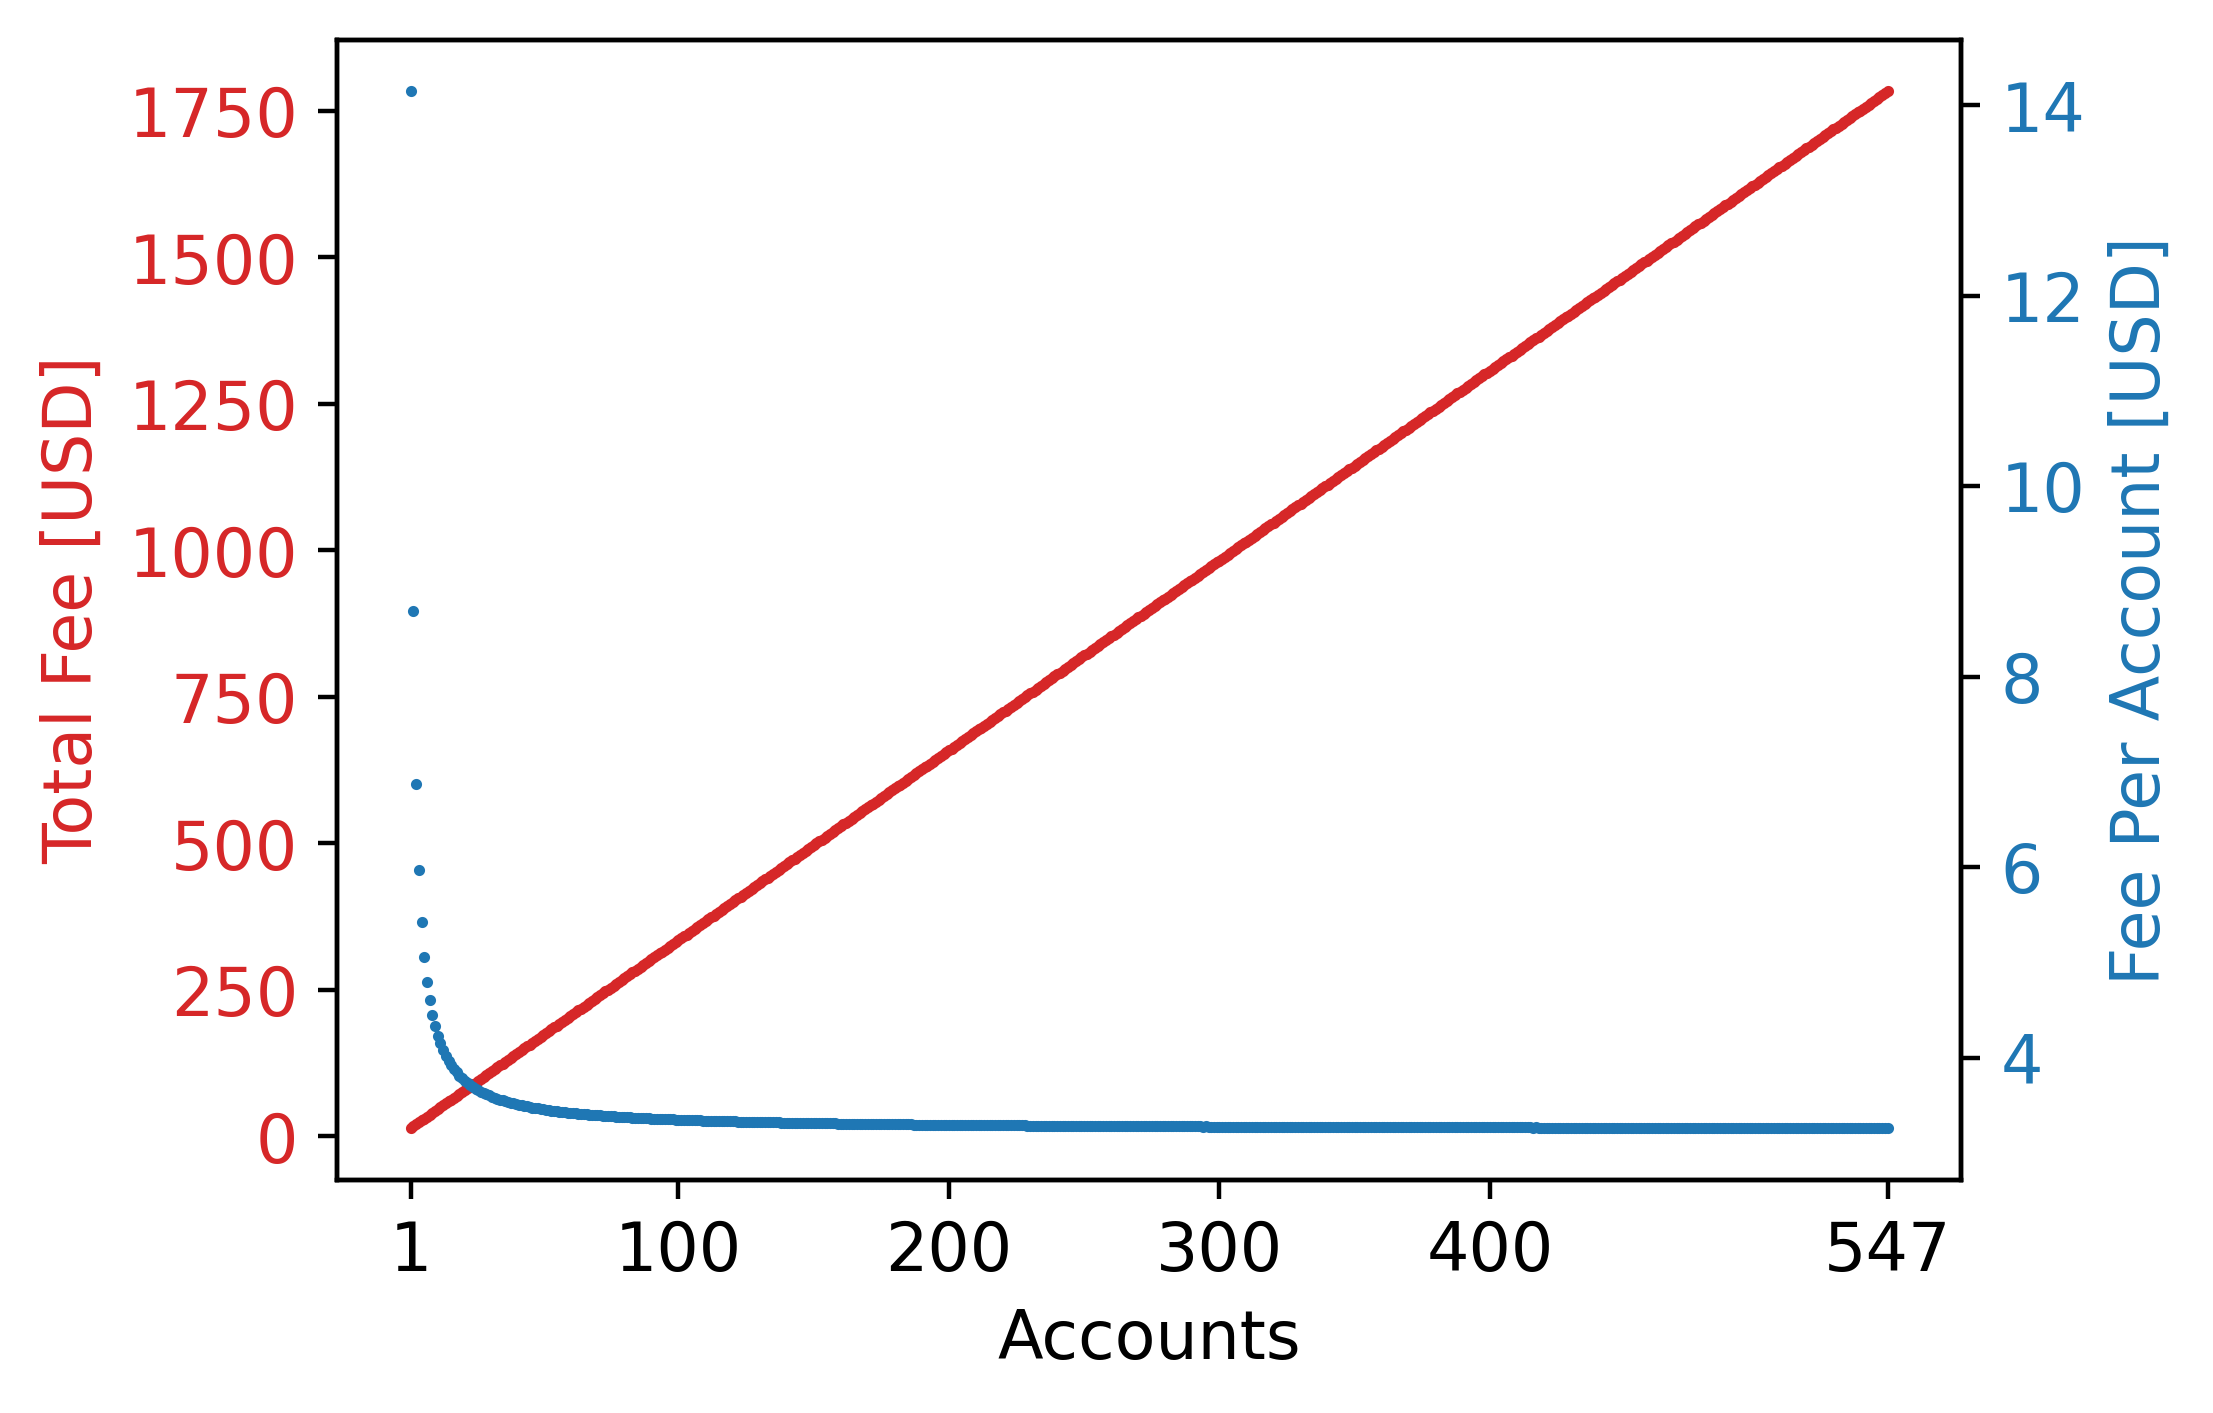

In [80]:
font = {'size': 12}
plt.rc('font', **font)

safeas = 'former-payout-fill-preset.pdf'
title = 'Former Solution Fill'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = formerAccounts
ax1_y = formerFillPresetUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = formerAccounts
ax2_y = formerFillPresetPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 551, 100)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 547


fig, ax1 = plt.subplots(dpi=400)
color = ax1_color
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ax1_ylabel, color=color)
ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = ax2_color
ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
ax1.set(xticks=xaxis_ticks)#, title=title)

fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
plt.savefig('plots/' + safeas, bbox_inches='tight', pad_inches=0.1)
plt.show()

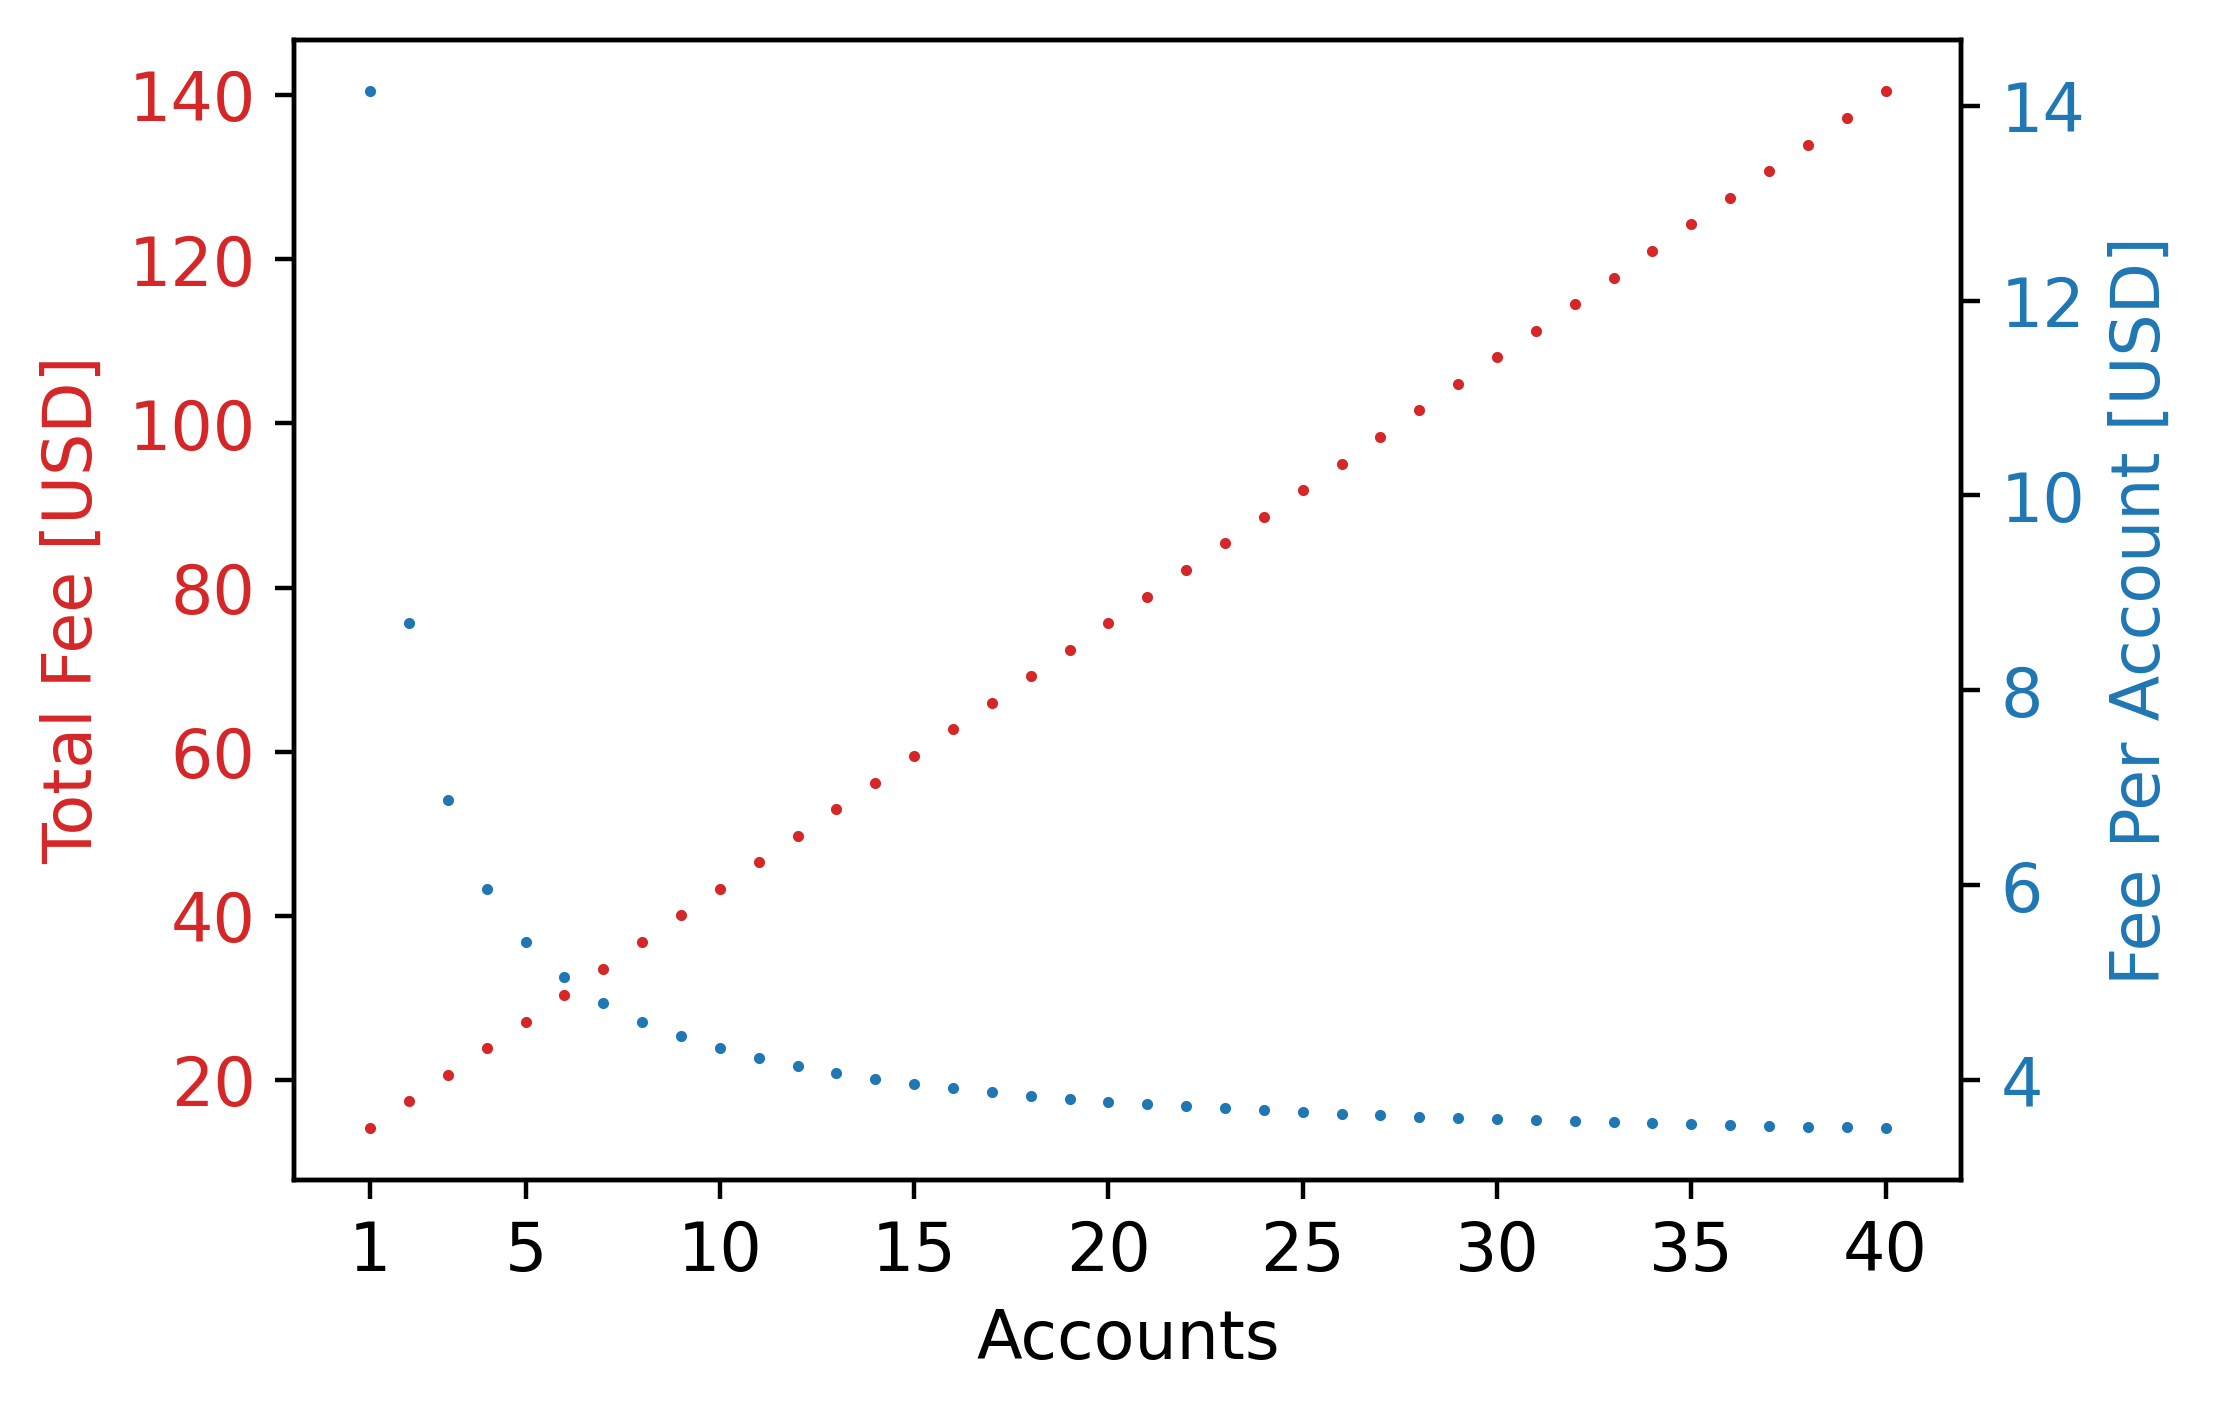

In [22]:
font = {'size': 12}
plt.rc('font', **font)

safeas = 'former-payout-fill-40.pdf'
title = 'Former Solution Fill'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = formerAccounts[:40]
ax1_y = formerFillPresetUSD[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = formerAccounts[:40]
ax2_y = formerFillPresetPerAccountUSD[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 40


fig, ax1 = plt.subplots(dpi=400)
color = ax1_color
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ax1_ylabel, color=color)
ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = ax2_color
ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
ax2.tick_params(axis='y', labelcolor=color)
ax1.set(xticks=xaxis_ticks)#, title=title)

fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
plt.savefig('plots/' + safeas, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [23]:
################ Compute payout scenarios 1-3 (consider preset when calculating)
# then plot comparison between former approach, ethereum, and neo n3 (might result in more than one plot per scenario)

In [24]:
def createDoublePlot(safeas, title, xlabel,
                     ax1_ylabel, ax1_x, ax1_y, ax1_color,
                     ax2_ylabel, ax2_x, ax2_y, ax2_color,
                     xaxis_ticks):
    fig, ax1 = plt.subplots(dpi=400)
    color = ax1_color
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ax1_ylabel, color=color)
    ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = ax2_color
    ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
    ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.set(xticks=xaxis_ticks)#, title=title)

    fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
    plt.savefig('plots/' + safeas, bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [25]:
def createDoublePlotasdf(safeas, title, xlabel,
                     ax1_ylabel, ax1_x, ax1_y, ax1_color,
                     ax2_ylabel, ax2_x, ax2_y, ax2_color,
                     xaxis_ticks_1, xaxis_ticks_2):
    fig, axes = plt.subplots(1, 2, figsize = (20, 10))
    fig.suptitle(title)
    color = ax1_color
    ax1 = axes[0]
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ax1_ylabel, color=color)
    ax1.plot(ax1_x, ax1_y, color=color, marker='o', markersize=1, linestyle="None")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = ax2_color
    ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
    ax2.plot(ax2_x, ax2_y, color=color, marker='o', markersize=1, linestyle="None")
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.set(xticks=xaxis_ticks_1)#, title=title)
    
    color = ax1_color
    ax1 = axes[1]
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ax1_ylabel, color=color)
    ax1.plot(ax1_x[:40], ax1_y[:40], color=color, marker='o', markersize=2, linestyle="None")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = ax2_color
    ax2.set_ylabel(ax2_ylabel, color=color)  # we already handled the x-label with ax1
    ax2.plot(ax2_x[:40], ax2_y[:40], color=color, marker='o', markersize=2, linestyle="None")
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.set(xticks=xaxis_ticks_2)#, title=title)

    fig.tight_layout(pad=2.0)  # otherwise the right y-label is slightly clipped
    plt.savefig('plots/' + safeas, dpi = 400)
    plt.show()

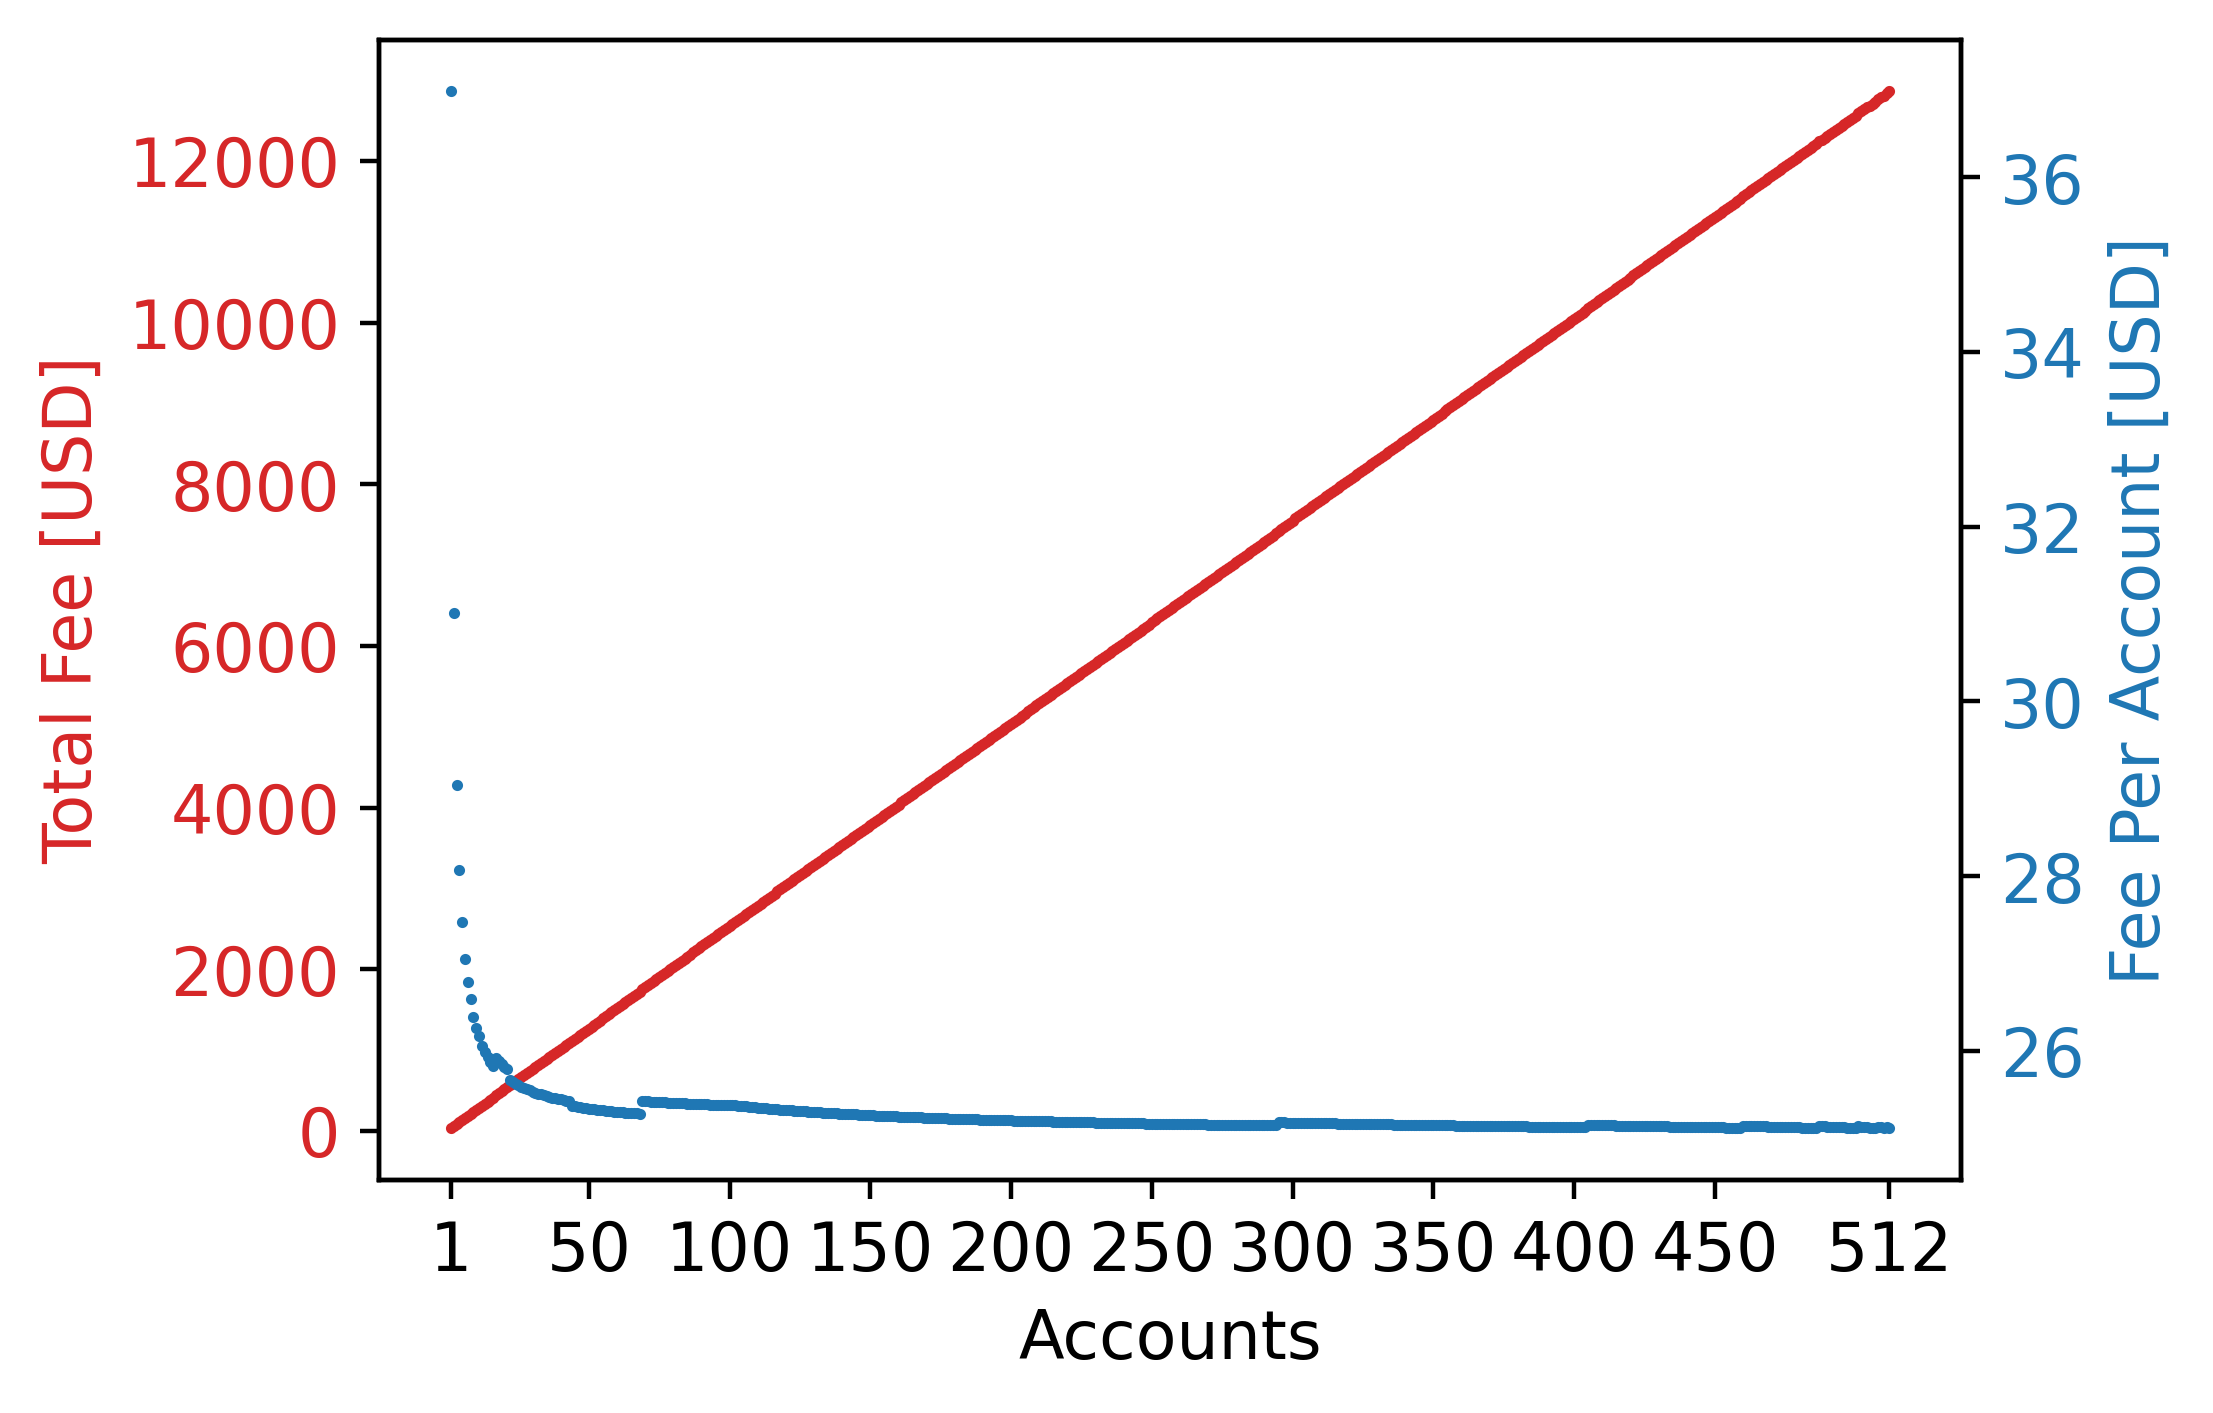

In [26]:
# Plot Ethereum Batched Payout

safeas = 'eth-batchPayout.pdf'
title = 'Batched Payout Ethereum'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts
ax1_y = ethBatchTotalUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = ethAccounts
ax2_y = ethBatchPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 512, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 512

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

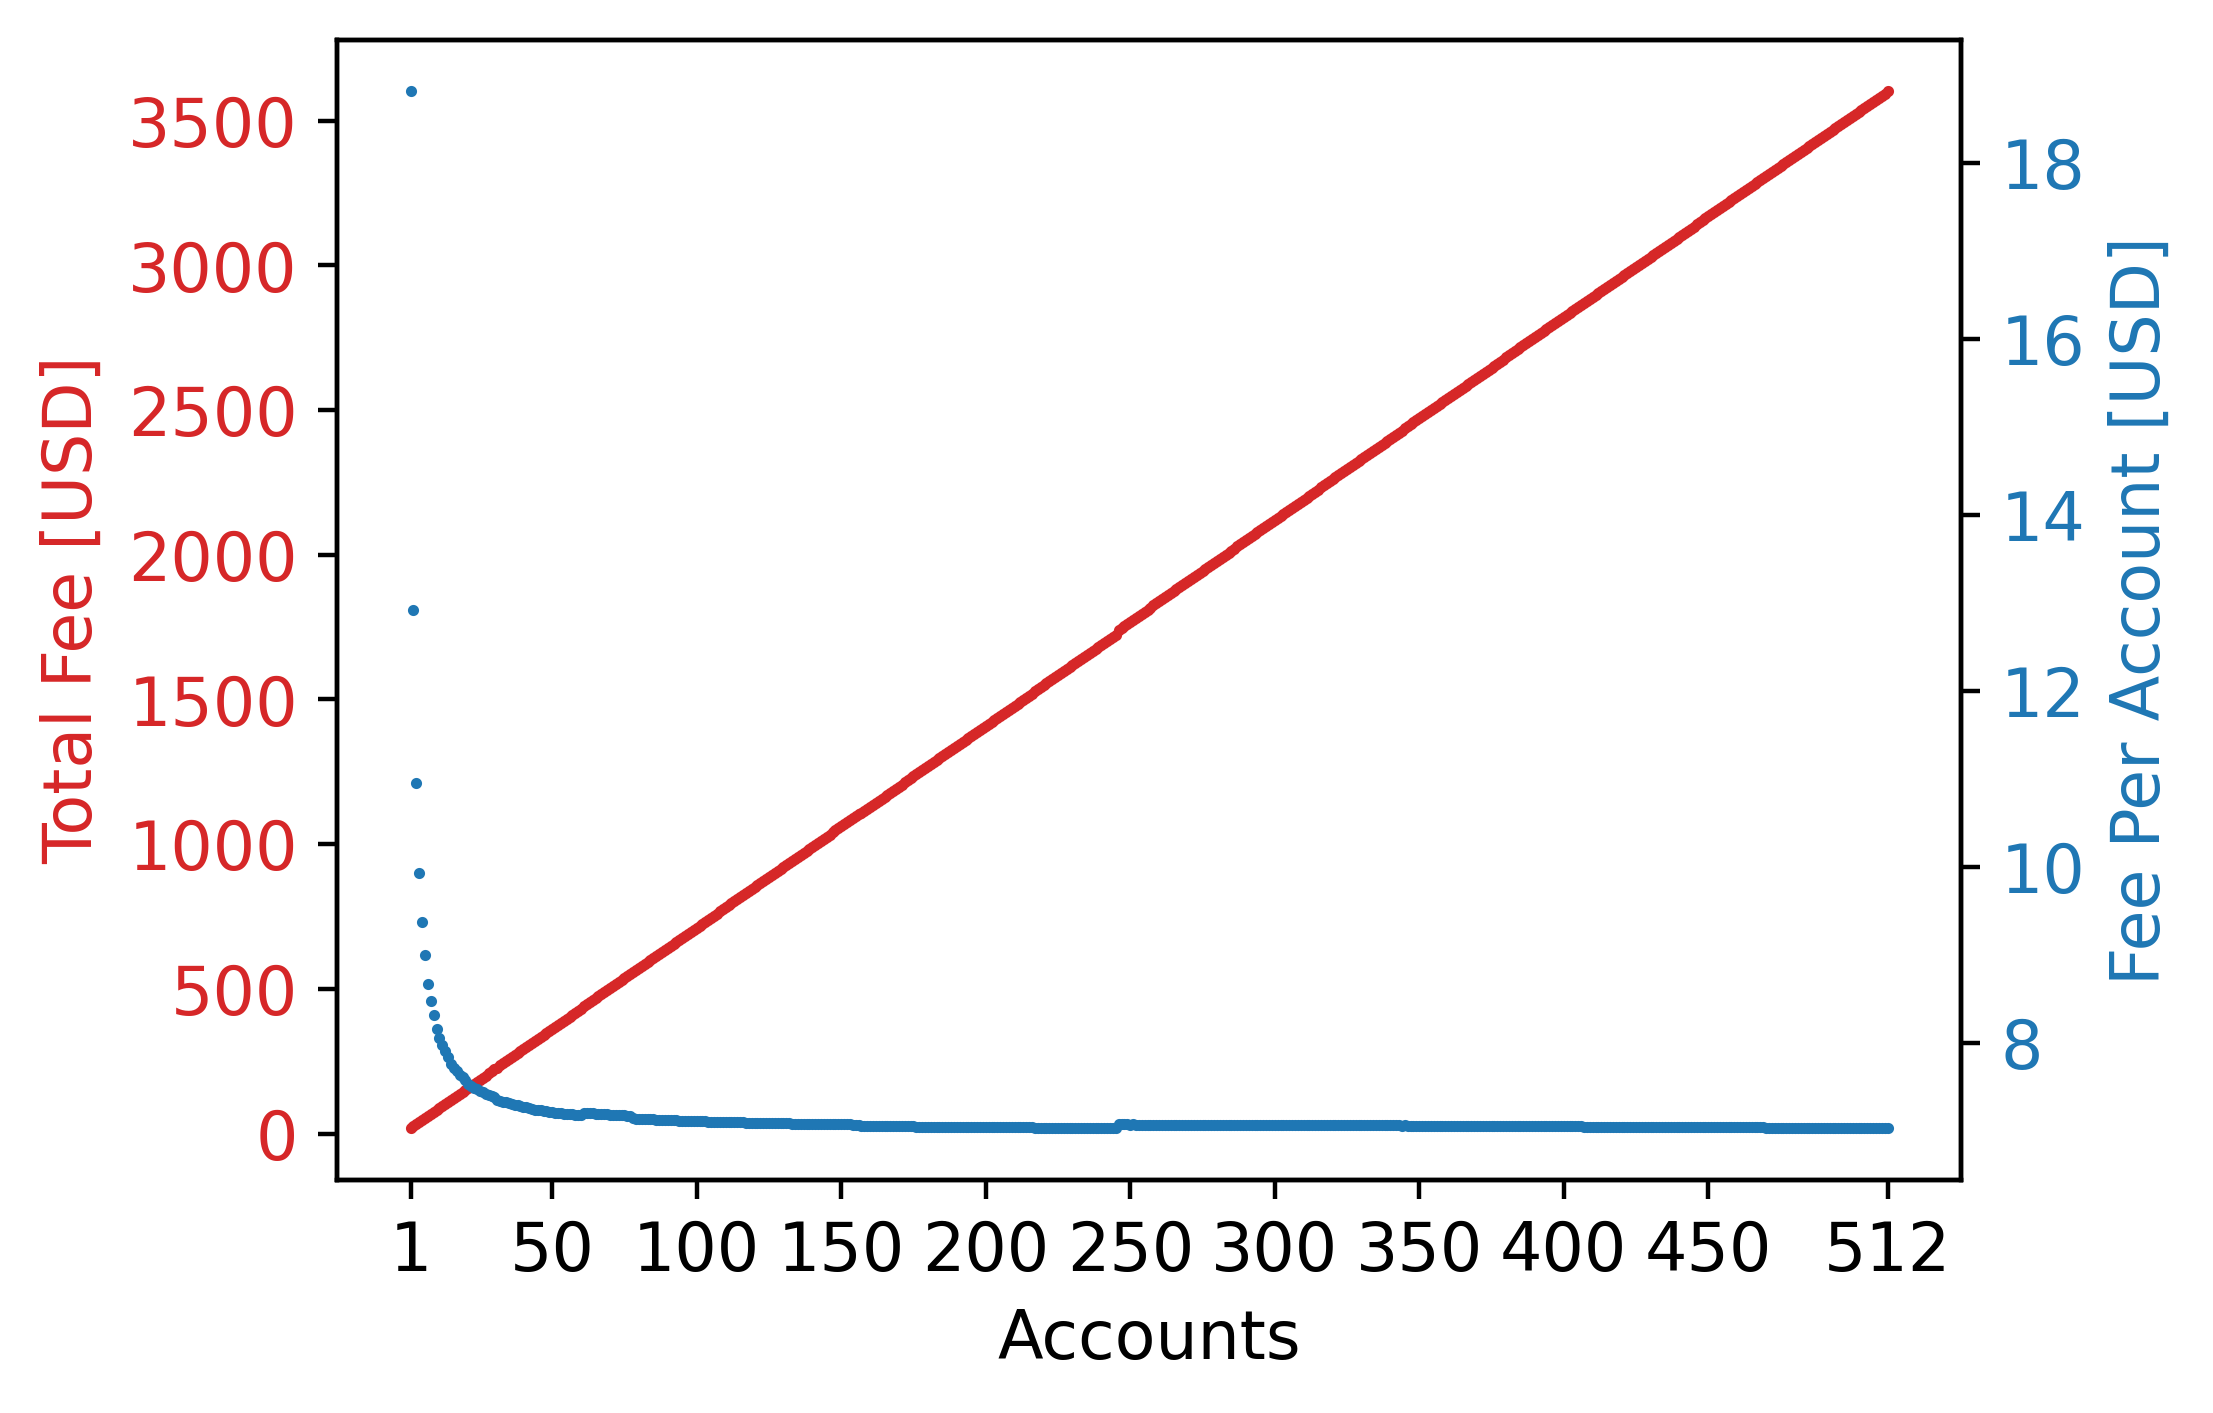

In [27]:
# Plot Ethereum Batched Payout (with preset values)

safeas = 'eth-batchPayout-preset.pdf'
title = 'Batched Payout Ethereum'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts
ax1_y = ethBatchPresetTotalUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = ethAccounts
ax2_y = ethBatchPresetPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 512, 50)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 512

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

In [28]:
print(neoWithdrawWitnessInt64PresetUSD)

0.11174699999999999


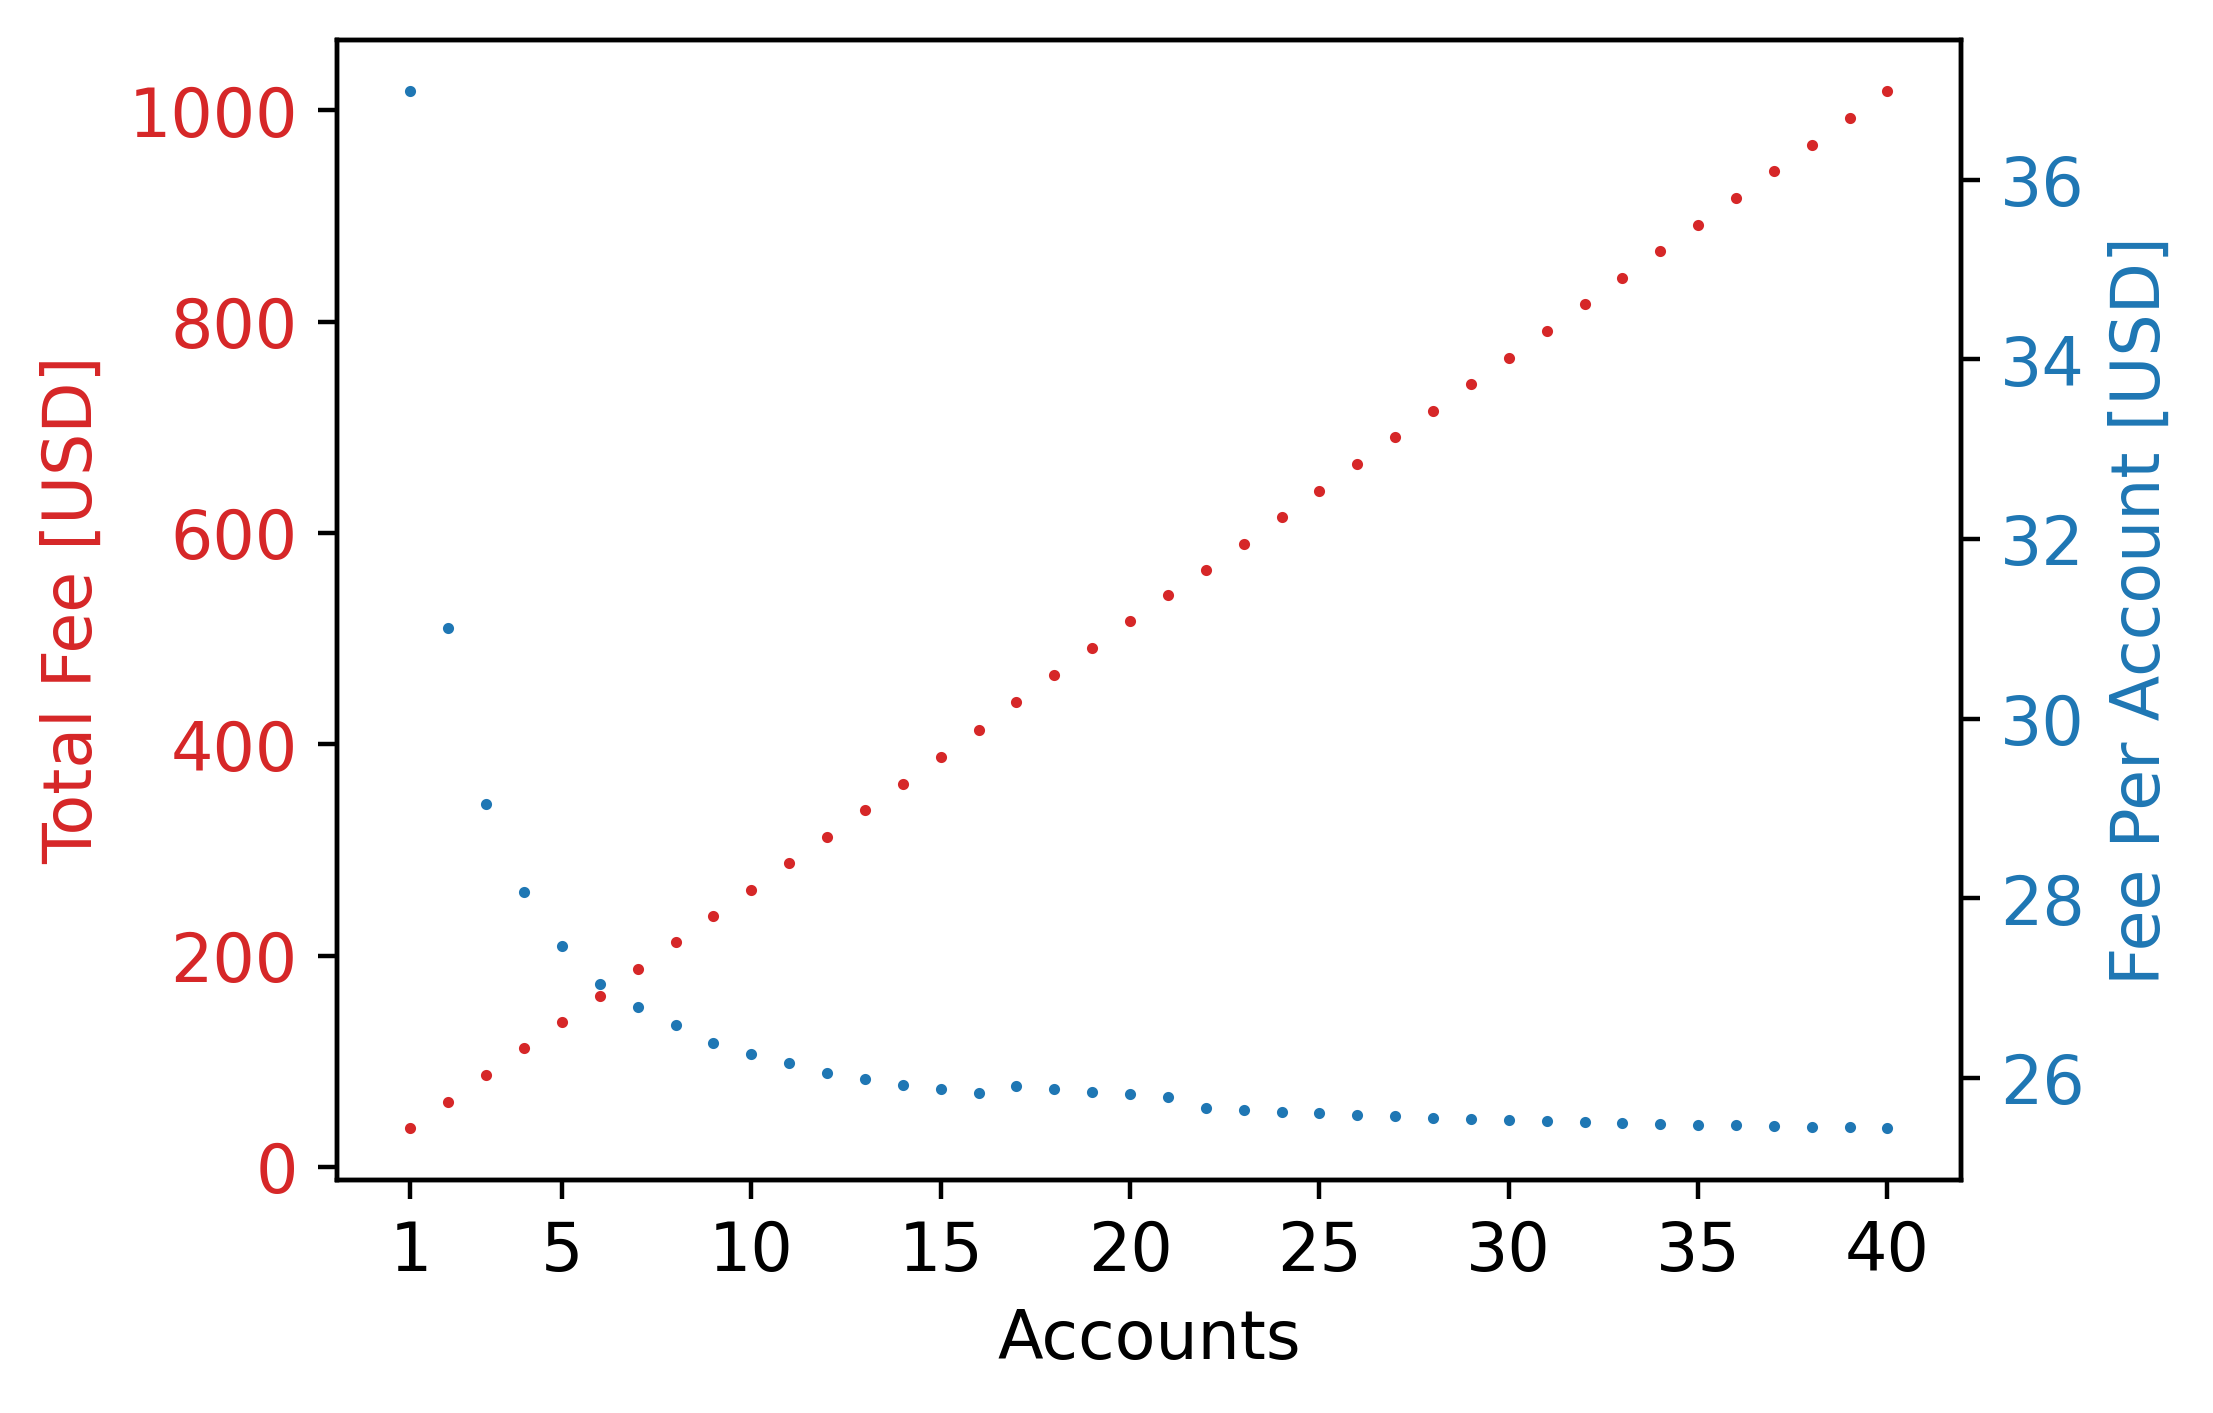

In [29]:
# Plot Ethereum Batched Payout (first 40)

safeas = 'eth-batchPayout-40.pdf'
title = 'Batched Payout Ethereum'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = ethAccounts[:40]
ax1_y = ethBatchTotalUSD[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = ethAccounts[:40]
ax2_y = ethBatchPerAccountUSD[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 40

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

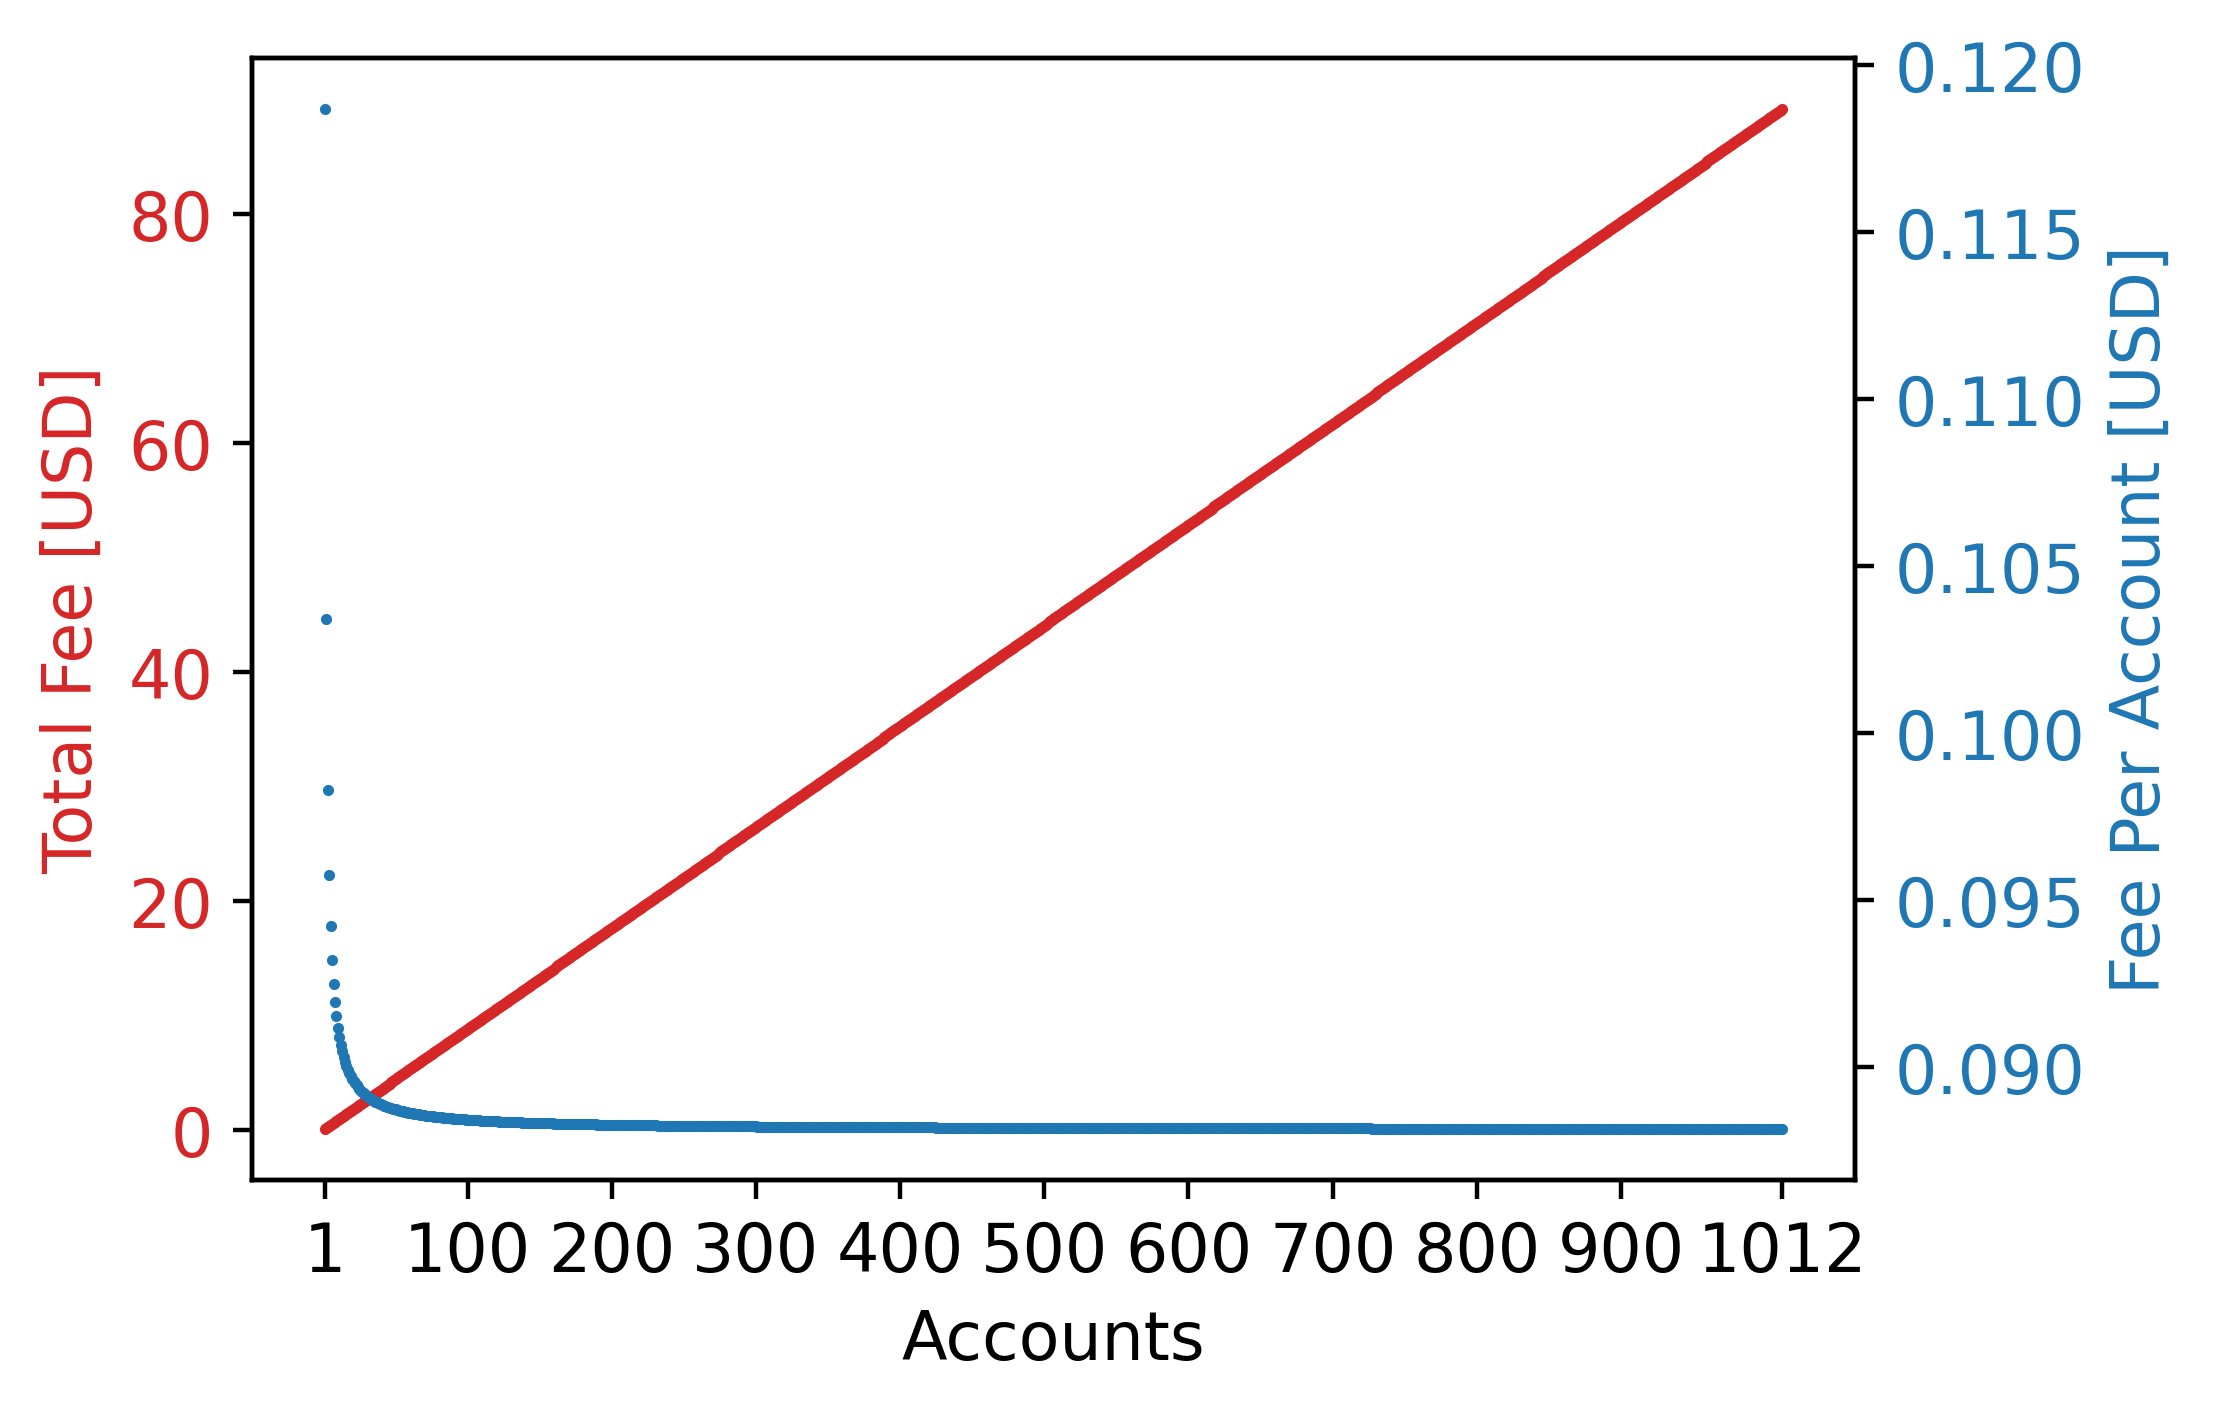

In [30]:
# Plot Neo N3 Batched Payout

safeas = 'neo-batchPayout.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = neoAccounts
ax1_y = neoBatchTotalUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts
ax2_y = neoBatchPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 1012, 100)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 1012

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

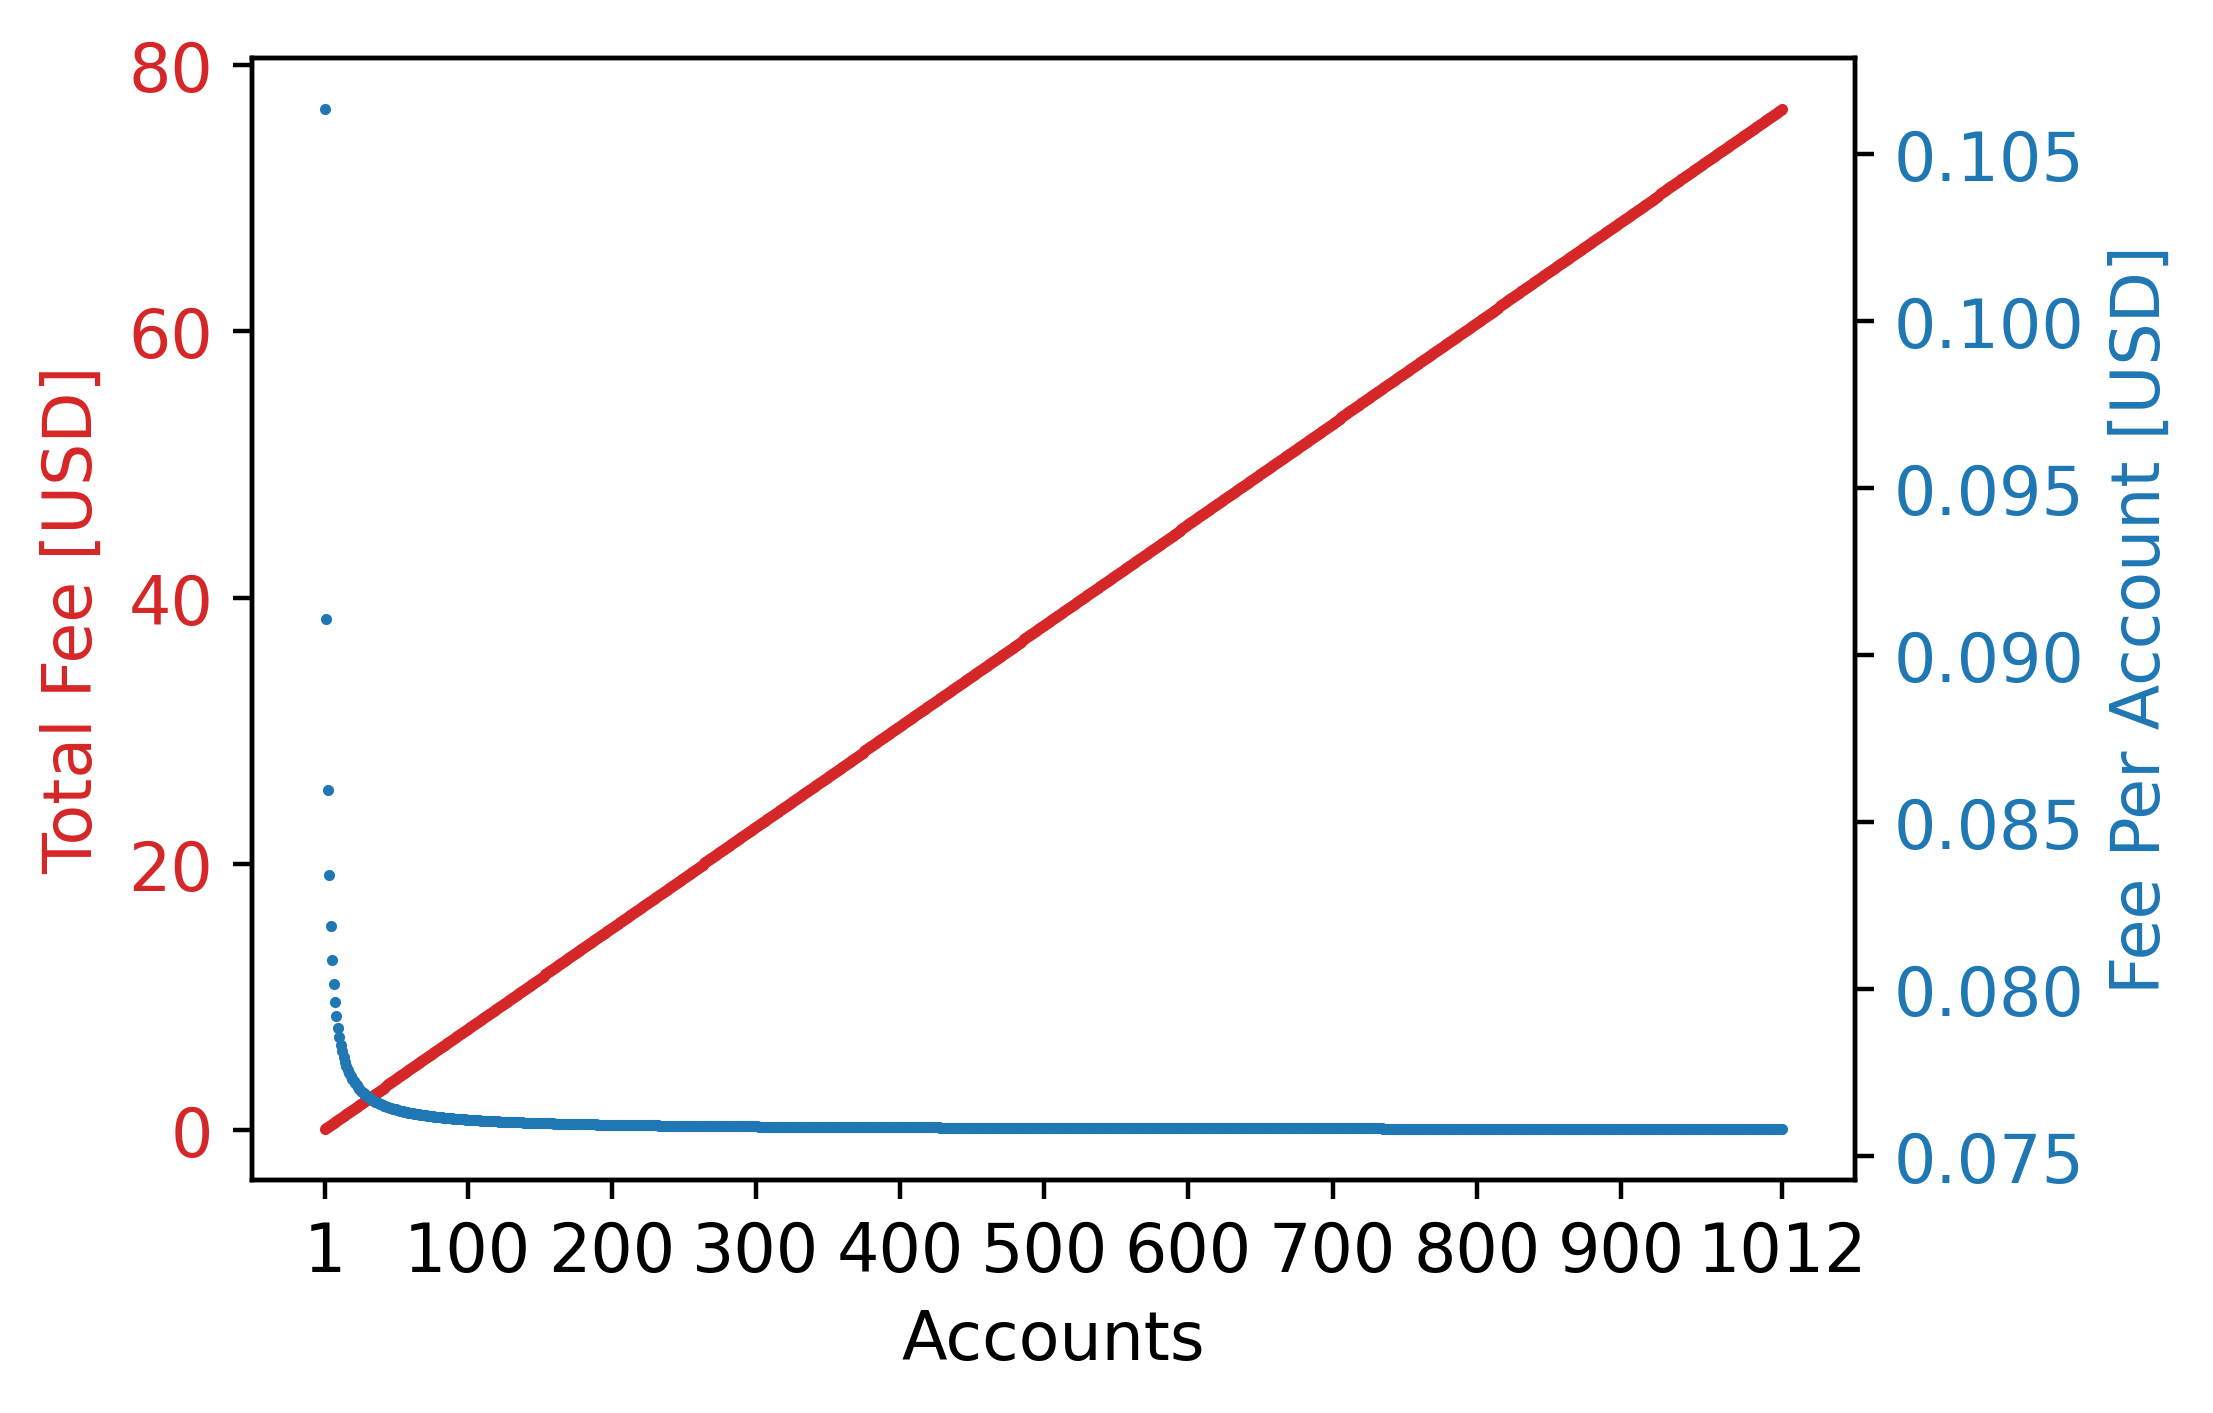

In [31]:
# Plot Neo N3 Batched Payout (with preset values)

safeas = 'neo-batchPayout-preset.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = neoAccounts
ax1_y = neoBatchPresetTotalUSD
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts
ax2_y = neoBatchPresetPerAccountUSD
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 1012, 100)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 1012

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

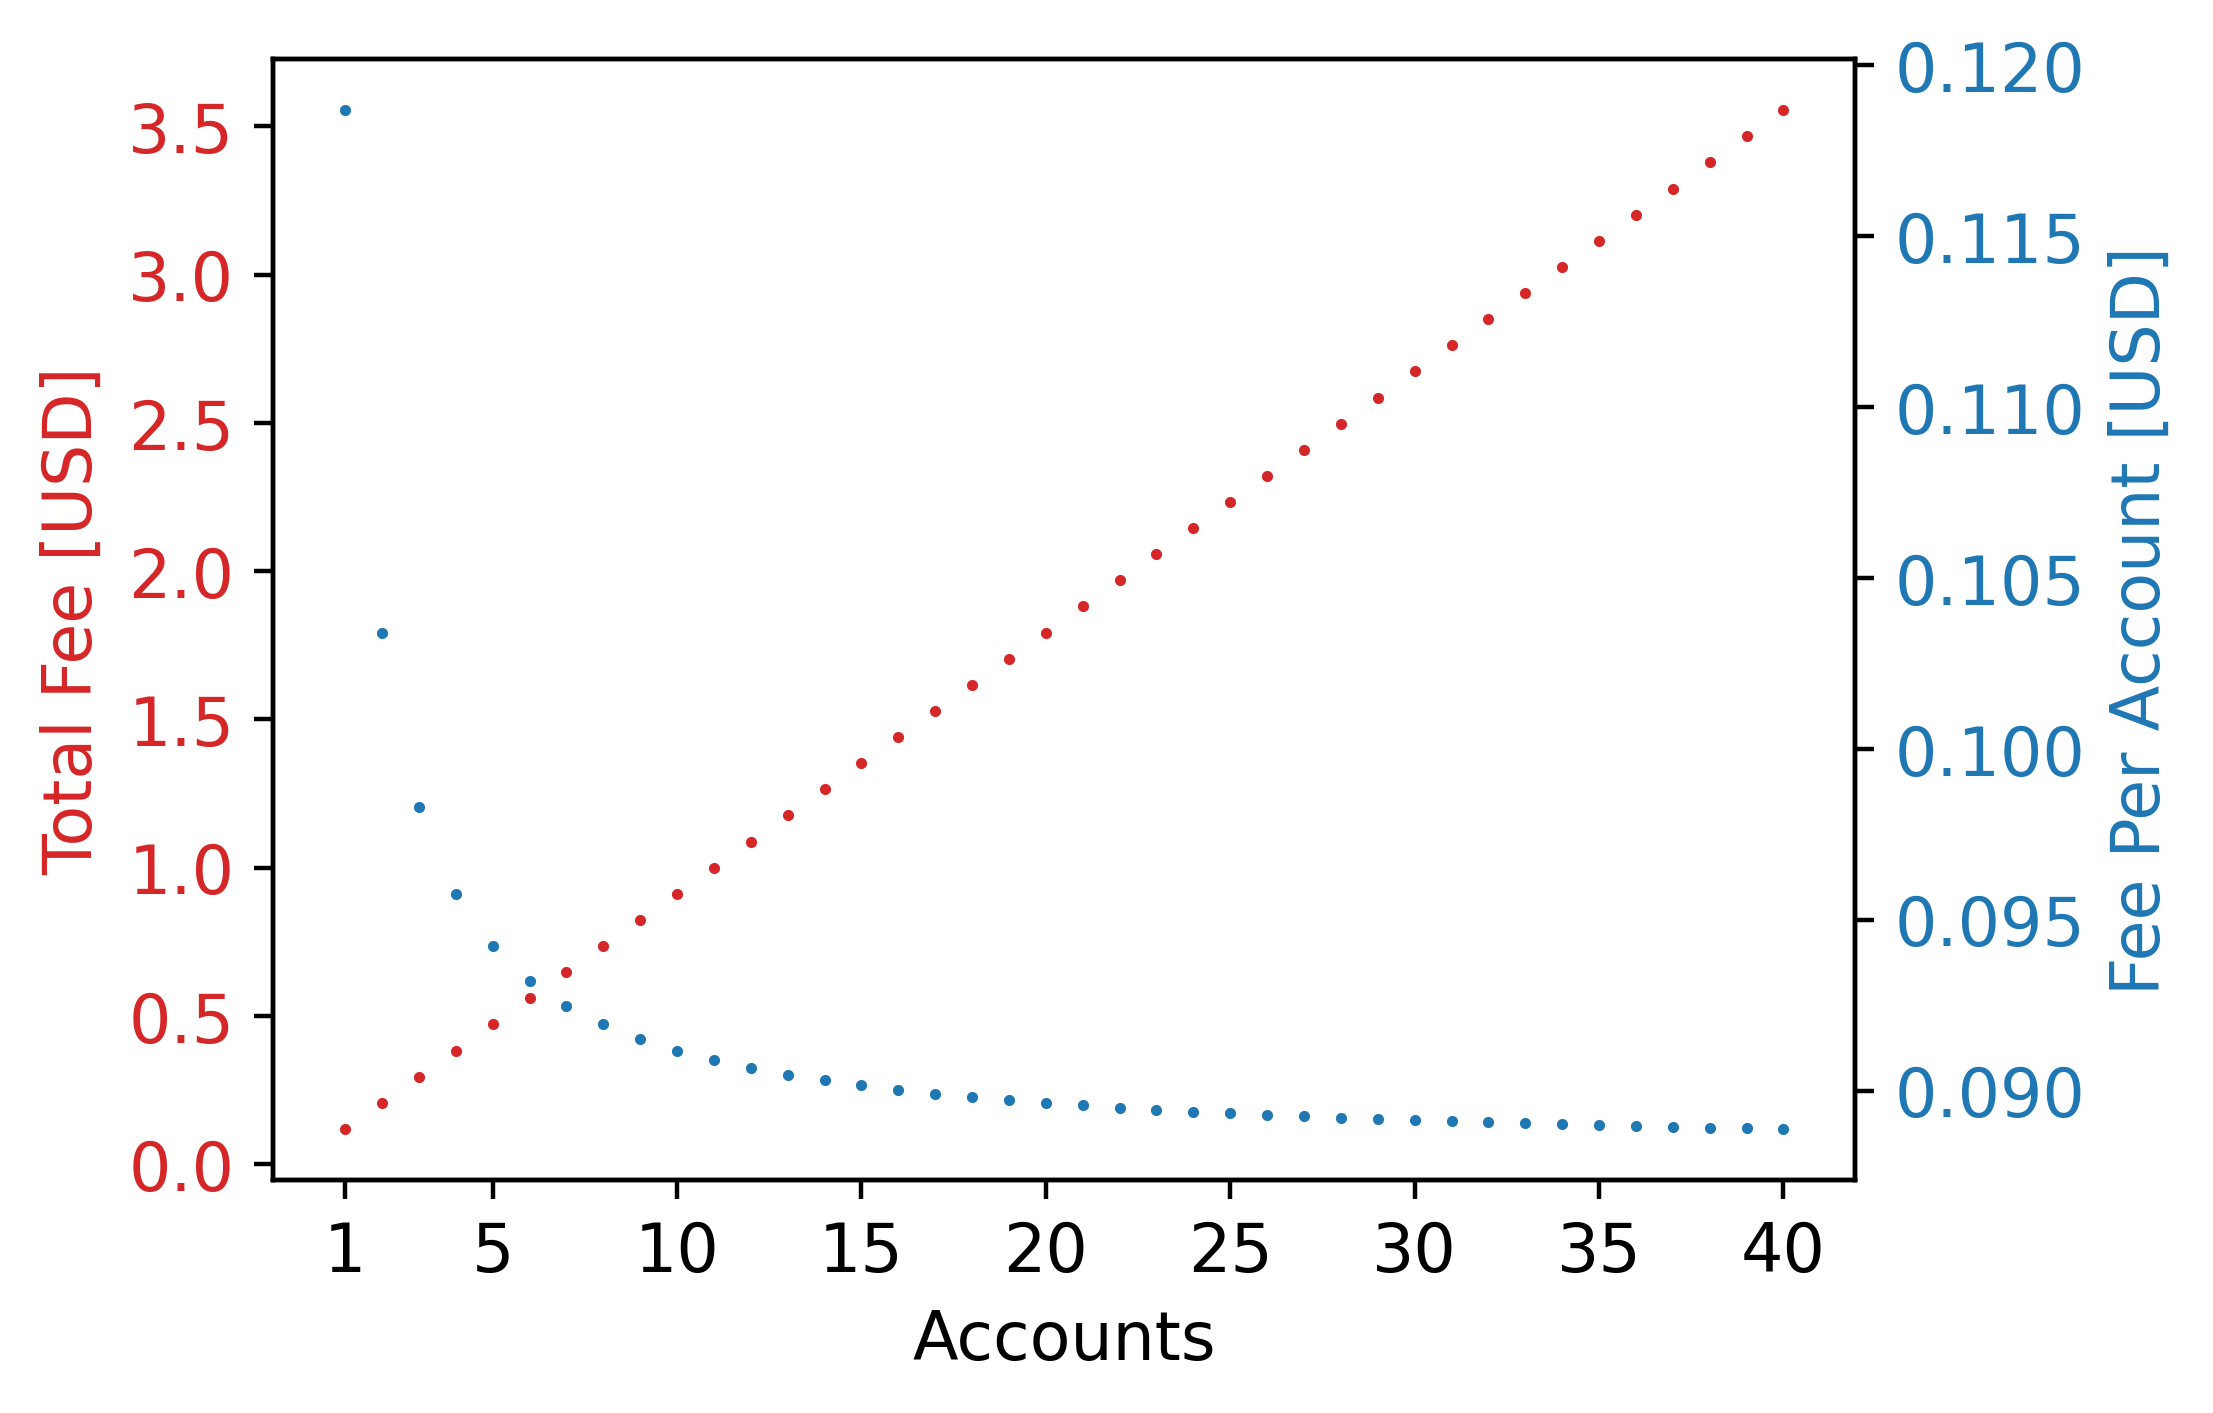

In [32]:
# Plot Neo N3 Batched Payout

safeas = 'neo-batchPayout-40.pdf'
title = 'Batched Payout Neo N3'
xlabel = 'Accounts'
ax1_ylabel = 'Total Fee [USD]'
ax1_x = neoAccounts[:40]
ax1_y = neoBatchTotalUSD[:40]
ax1_color = 'tab:red'
ax2_ylabel = 'Fee Per Account [USD]'
ax2_x = neoAccounts[:40]
ax2_y = neoBatchPerAccountUSD[:40]
ax2_color = 'tab:blue'
xaxis_ticks = np.arange(0, 41, 5)
xaxis_ticks[0] = 1
xaxis_ticks[len(xaxis_ticks)-1] = 40

createDoublePlot(safeas, title, xlabel,
                 ax1_ylabel, ax1_x, ax1_y, ax1_color,
                 ax2_ylabel, ax2_x, ax2_y, ax2_color,
                 xaxis_ticks)

In [33]:
print(ethBatchPerAccountUSD[19])

25.81806


In [34]:
print(ethBatchPerAccountUSD[511])

25.11974


In [39]:
print(neoBatchPresetPerAccountUSD[0]/neoBatchPerAccountUSD[0])

0.89614221871714


In [38]:
print(neoBatchPresetPerAccountUSD[0])

0.10635846000000002


In [49]:
formerTransparency1 = 52*formerFillPresetUSD[100]
formerReleaseWeekly1 = 52*formerReleaseUSD
formerReleaseMonthly1 = 12*formerReleaseUSD
formerTotal = formerTransparency1 + formerReleaseWeekly1*20 + formerReleaseMonthly1*80
print(formerTransparency1)
print(formerReleaseWeekly1)
print(formerReleaseMonthly1)
print(formerTotal)

weeklyReleasePerDev = formerTransparency1/100 + formerReleaseWeekly1
monthlyReleasePerDev = formerTransparency1/100 + formerReleaseMonthly1
print(weeklyReleasePerDev)
print(monthlyReleasePerDev)

17577.3078
823.94364
190.14084
49267.447799999994
999.7167179999999
365.91391799999997


In [64]:
# Scenario 1
sc1_ethBatchedPayoutTotal = 40*ethBatchPresetTotalUSD[20]+12*ethBatchPresetTotalUSD[100]
sc1_ethWithdrawTotal = ethWithdrawPresetUSD * (52*20 + 12*80)
sc1_neoBatchedPayoutTotal = 40*neoBatchPresetTotalUSD[20]+12*neoBatchPresetTotalUSD[100]
sc1_neoWithdrawTotal = neoWithdrawSignatureInt64PresetUSD * (52*20 + 12*80)
print(sc1_ethBatchedPayoutTotal)
print(sc1_ethWithdrawTotal)
print(sc1_neoBatchedPayoutTotal)
print(sc1_neoWithdrawTotal)



14948.81412
41487.26
157.09980792
243.4992


In [83]:
# Scenario 2
#batch= 52*batch[20] + 12*batch[60] + 2*batch[20]
# => 2*batch[100] + 10*batch[80] + 40*batch[20]
#withdraw = withdrawCost * (20*52 + 60*12 + 20*2)
sc2_ethBatchedPayoutTotal = 2*ethBatchPresetTotalUSD[100]+10*ethBatchPresetTotalUSD[80]+40*ethBatchPresetTotalUSD[20]
sc2_ethWithdrawTotal = ethWithdrawPresetUSD * (52*20 + 12*60 + 2*20)
sc2_neoBatchedPayoutTotal = 2*neoBatchPresetTotalUSD[100]+10*neoBatchPresetTotalUSD[80]+40*neoBatchPresetTotalUSD[20]
sc2_neoWithdrawTotal = neoWithdrawSignatureInt64PresetUSD * (52*20 + 12*60 + 2*20)
print(sc2_ethBatchedPayoutTotal)
print(sc2_ethWithdrawTotal)
print(sc2_neoBatchedPayoutTotal)
print(sc2_neoWithdrawTotal)

# Former:
# 40*fill[80] + 12*fill[100]
# 40*80*release + 12*100*release
fillCost = 52*formerFillPresetUSD[100]
releaseCost = formerReleaseUSD*(20*2+60*12+20*52)
print("###")
print(fillCost)
print(releaseCost)
print(fillCost + releaseCost)


13548.59652
37338.534
141.94301592
219.14928
###
17577.3078
28521.126
46098.4338


In [68]:
# Scenario 3
#batch= 12*batch[40] + 4*batch[40] + 1*batch[20]
# => 1*batch[100] + 3*batch[80] + 8*batch[40]
#withdraw = withdrawCost * (12*40 + 4*40 + 1*20)
sc3_ethBatchedPayoutTotal = 1*ethBatchPresetTotalUSD[100]+3*ethBatchPresetTotalUSD[80]+8*ethBatchPresetTotalUSD[40]
sc3_ethWithdrawTotal = ethWithdrawPresetUSD * (12*40 + 4*40 + 1*20)
sc3_neoBatchedPayoutTotal = 1*neoBatchPresetTotalUSD[100]+3*neoBatchPresetTotalUSD[80]+8*neoBatchPresetTotalUSD[40]
sc3_neoWithdrawTotal = neoWithdrawSignatureInt64PresetUSD * (12*40 + 4*40 + 1*20)
print(sc3_ethBatchedPayoutTotal)
print(sc3_ethWithdrawTotal)
print(sc3_neoBatchedPayoutTotal)
print(sc3_neoWithdrawTotal)

# Former Approach
fillCost = 
365 * formerFillPresetUSD[100]+(40*12+40*4+20*1)*formerReleaseUSD

4836.1842
13690.7958
51.29400312
80.354736


133836.92595